#### Importation des packages

In [2]:
library(corrplot)
library(ggplot2)
library(lattice)
library(rpart)
library(partykit)
library(randomForest)
library(ROCR)
library(missForest)
library(reshape2)
library(FactoMineR)
library(factoextra)
#library(rgl)
library(plotly)
library(dplyr)
library(gridExtra)
library(bestglm)
library(MASS)
library(VGAM)
library(e1071)
library(glmnet)
library(broom)
library(gbm)
library(bestglm)
library(adabag)
library(caret)

corrplot 0.84 loaded
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: grid
Loading required package: libcoin
Loading required package: mvtnorm
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

Loading required package: gplots
Warning message:
“package ‘gplots’ was built under R version 3.6.2”
Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Loading required package: foreach
Loading required package: itertools
Loading required package: iterators
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The fol

#### Importation des données <br>


http://archive.ics.uci.edu/ml/datasets/Energy+efficiency

In [3]:
data.complet <- read.csv('DataEnergy.csv')
x <- data.complet
head(x)

Relative.compactness Surface.area Wall.area Roof.area Overall.height
1 0.9829276            530.4900     306.4846  112.0027  7             
2 0.9835473            519.8724     299.7763  110.0480  7             
3 0.9794535            516.1912     303.3744  106.4084  7             
4 0.9777325            518.9241     292.8122  113.0559  7             
5 0.9030294            552.9689     316.2361  118.3664  7             
6 0.8909102            558.6037     314.9162  121.8437  7             
  orientation Glazing.area  Glazing.area.distr Energy   Energy.efficiency
1 North        1.609490e-02 0                  34.26394 B                
2 East        -9.386813e-03 0                  34.58975 B                
3 South       -6.974937e-04 0                  38.77805 C                
4 West         9.554434e-06 0                  37.94781 C                
5 North       -6.592326e-03 0                  47.67586 D                
6 East        -1.612145e-02 0                  41.90847 C

#### Résumé des variables :

* **Relative compactness** : Compacité relative (propriété liée à la forme du batiment et sa surface)
* **Surface area** : Superficie totale du batiment
* **Wall area** : Surface des murs
* **Roof area** : Surface du toit
* **Overal height** : Hauteur du batiment (Qualitative ordonnée: 3,5m et 7m)
* **Orientation** : Orientation du batiment (North, East, South, West)
* **Glazing area** : Surface totale des vitrages du batiment 
* **Glazing area distr** : Orientation des vitrages du batiment (55% East, 55% South, etc)
* **Energy** : quantifie les performances énergétique du batiment 
* **Energy efficiency** : Lettre de classification des performances énergétique du batiment

<br>

#### Préparation des variables

In [4]:
str(x)

'data.frame':	768 obs. of  10 variables:
 $ Relative.compactness: num  0.983 0.984 0.979 0.978 0.903 ...
 $ Surface.area        : num  530 520 516 519 553 ...
 $ Wall.area           : num  306 300 303 293 316 ...
 $ Roof.area           : num  112 110 106 113 118 ...
 $ Overall.height      : num  7 7 7 7 7 7 7 7 7 7 ...
 $ orientation         : Factor w/ 4 levels "East","North",..: 2 1 3 4 2 1 3 4 2 1 ...
 $ Glazing.area        : num  1.61e-02 -9.39e-03 -6.97e-04 9.55e-06 -6.59e-03 ...
 $ Glazing.area.distr  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Energy              : num  34.3 34.6 38.8 37.9 47.7 ...
 $ Energy.efficiency   : Factor w/ 7 levels "A","B","C","D",..: 2 2 3 3 4 3 3 3 4 4 ...


In [5]:
x$Glazing.area.distr <- as.factor(x$Glazing.area.distr)
levels(x$Glazing.area.distr) <- c("No Glazing", "55% North", "55% East", 
                                  "55% South", "55% West", "Uniform")


x$Energy.efficiency <- factor(x$Energy.efficiency, ordered=TRUE)

In [6]:
summary(x)

 Relative.compactness  Surface.area     Wall.area       Roof.area    
 Min.   :0.6125       Min.   :501.4   Min.   :234.3   Min.   :105.3  
 1st Qu.:0.6779       1st Qu.:598.7   1st Qu.:291.8   1st Qu.:137.4  
 Median :0.7517       Median :673.1   Median :315.8   Median :183.3  
 Mean   :0.7645       Mean   :671.3   Mean   :318.3   Mean   :176.5  
 3rd Qu.:0.8350       3rd Qu.:744.6   3rd Qu.:343.0   3rd Qu.:220.5  
 Max.   :0.9912       Max.   :826.0   Max.   :425.8   Max.   :225.8  
                                                                     
 Overall.height orientation  Glazing.area       Glazing.area.distr
 Min.   :3.50   East :192   Min.   :-0.02401   No Glazing: 48     
 1st Qu.:3.50   North:192   1st Qu.: 0.10306   55% North :144     
 Median :5.25   South:192   Median : 0.24752   55% East  :144     
 Mean   :5.25   West :192   Mean   : 0.23435   55% South :144     
 3rd Qu.:7.00               3rd Qu.: 0.39119   55% West  :144     
 Max.   :7.00               Max.   : 0

#### Commentaires : 

On remarque des valeurs négatives pour la variable Glazing Area, qui représente pourtant la surface totale des vitrages. En fait, ces valeurs négatives sont dues à un bruit ajouté. 
Regardons comment sont réparties ces valeurs négatives afin de leur appliquer une correction.

In [7]:
summary(x[which(x$Glazing.area<0),]$Glazing.area.distr)

No Glazing  55% North   55% East  55% South   55% West    Uniform 
        24          0          0          0          0          0

#### Commentaires : 

D'après le resultat ci-dessus, toutes les valeurs de Glazing.area inférieures à 0 appartiennent à la catégorie No glazing. On va donc forcer leur valeur à 0. 

In [8]:
x$Glazing.area[x$Glazing.area < 0] <- 0

On remarque aussi que la variable **overall.height** prend seulement deux niveaux ordonnés : 3,5m et 7,5m.
On va donc considérer cette variable comme catégorielle ordonnée :

In [9]:
x$Overall.height <- as.ordered(x$Overall.height)

## A. Analyse des données

### 1. Statistiques descriptives univariées

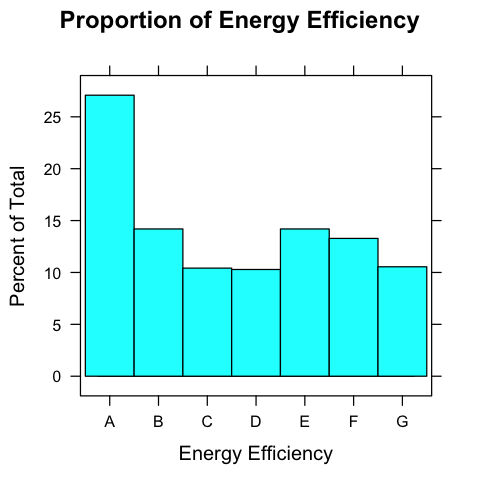

In [10]:
options(repr.plot.width = 4, repr.plot.height = 4) 
histogram(x$Energy.efficiency, freq=FALSE, xlab="Energy Efficiency", 
          main="Proportion of Energy Efficiency")

#### Commentaires :

La répartition des données par classe énergie est plutot uniforme. On observe cependant  que la classe A est majoritaire dans ce jeu de données.

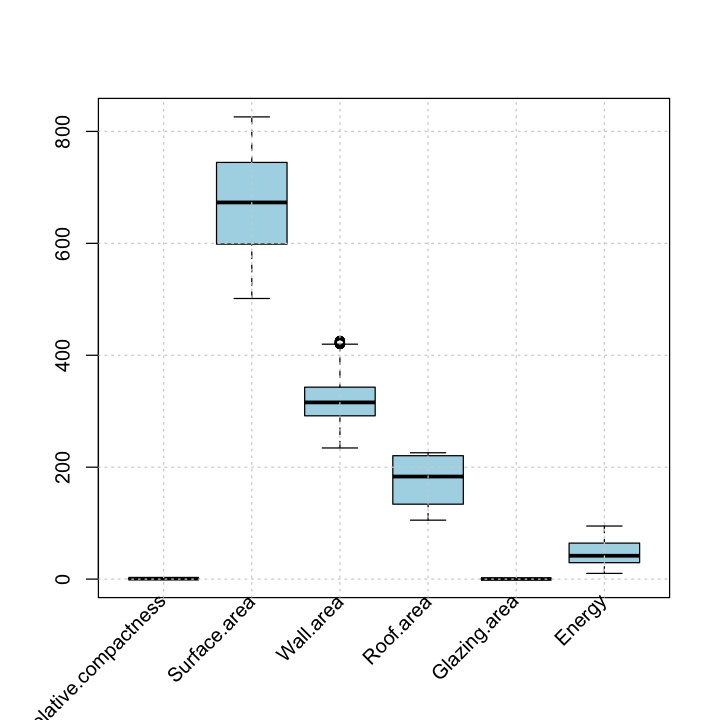

In [11]:
options(repr.plot.width = 6, repr.plot.height = 6) 
boxplot(x[,-c(5,6,8,10,11)], col='lightblue', xaxt = "n") #Add legend Add inclinaison
grid()
#Pas dans le même ordre de grandeur -> norm = True pendant ACP
text(seq_along(x[,-c(5,6,8,10,11)]), par("usr")[3] - 0.5, labels = names(x[,-c(5,6,8,10,11)]), srt = 45, adj = 1, xpd = TRUE);

#### Commentaires :

Les variables ne sont pas toutes de même ordre de grandeur mais les distributions semblent homogènes. Etant donné les ordres de grandeurs bien différents, une attention particulière sera accordée lors de la réalisation de l'ACP.

Il faut maintenant étudier plus précisemment la distribution de ces variables.

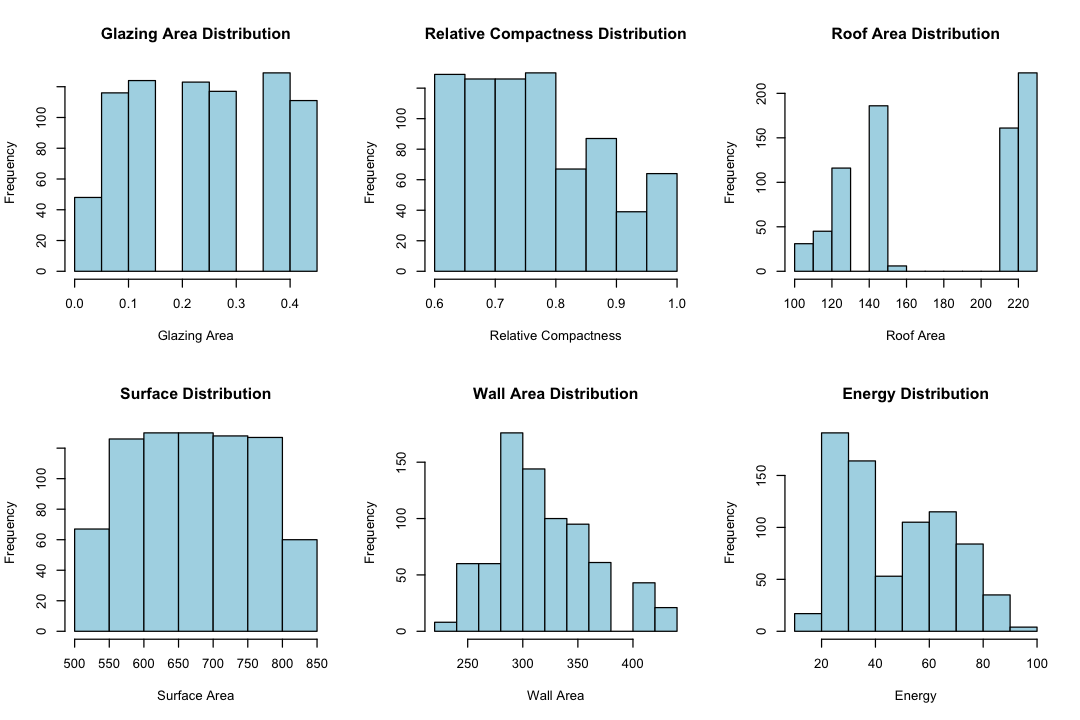

In [12]:
par(mfrow=c(2,3))
options(repr.plot.width = 9, repr.plot.height = 6) 

hist(x$Glazing.area, xlab='Glazing Area', main='Glazing Area Distribution',col='lightblue')
hist(x$Relative.compactness,xlab= 'Relative Compactness' ,main = 'Relative Compactness Distribution',col='lightblue')
hist(x$Roof.area,xlab= 'Roof Area' ,main = 'Roof Area Distribution',col='lightblue')
hist(x$Surface.area,xlab= 'Surface Area' ,main = 'Surface Distribution',col='lightblue')
hist(x$Wall.area,xlab= 'Wall Area' ,main = 'Wall Area Distribution',col='lightblue')
hist(x$Energy,xlab= 'Energy' ,main = 'Energy Distribution',col='lightblue')

#### Commentaires :

Il n'y a pas de transformation de variables nécessaires. 
On remarque tout de même que la variable **Roof Area** est inéquitablement répartie.

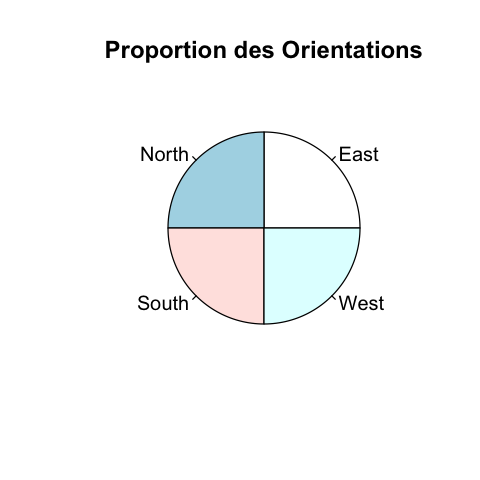

In [13]:
options(repr.plot.width = 4, repr.plot.height = 4) 
pie(table(x$orientation), main = "Proportion des Orientations")

#### Commentaires : 

La répartition des orientations des bâtiments est uniforme pour le jeu de données.

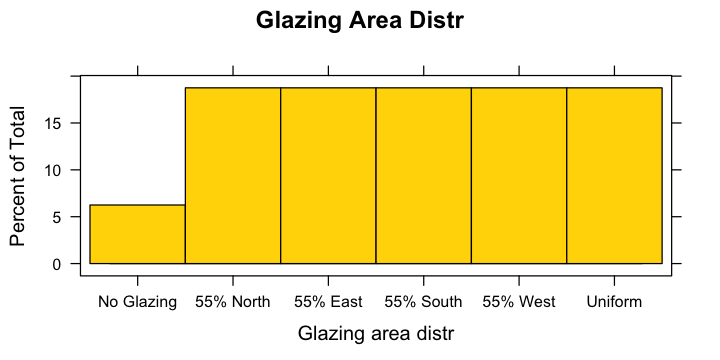

In [14]:
options(repr.plot.width = 6, repr.plot.height = 3) 
histogram(x$Glazing.area.distr,xlab= 'Glazing area distr' ,main = 'Glazing Area Distr',col='gold')
#text(seq_along(x[,-c(5,6,8,10,11)]), par("usr")[3] - 0.5, labels = names(x[,-c(5,6,8,10,11)]), srt = 45, adj = 1, xpd = TRUE);

#### Commentaires : 

La répartition des orientations des vitrages est équitable entre les différentes classes (55% Nord, 55% Est, 55% Sud, 55% Ouest et sans vitrage). Cependant, les batiments sans vitres sont minoritaires.

<br>

### 2. Statistiques descriptives multivariées

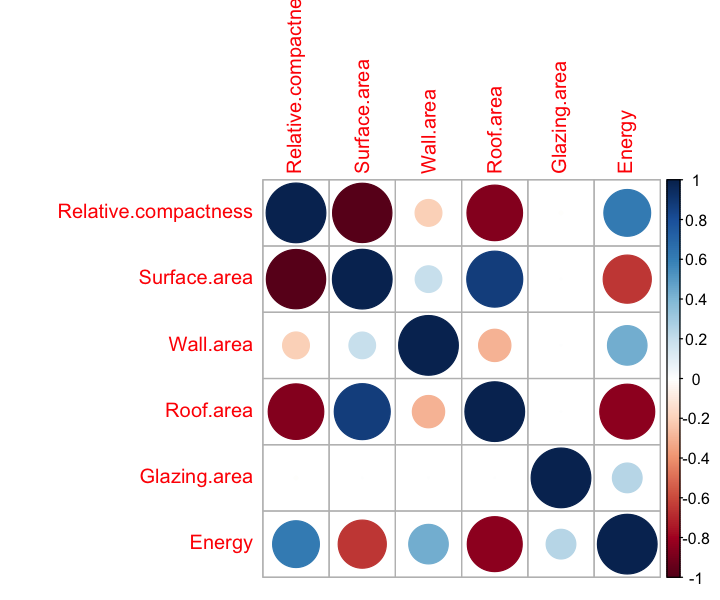

In [15]:
options(repr.plot.width = 6, repr.plot.height = 5) 
M <- cor(x[,-c(5,6,8,10,11)])
corrplot(M)

**Commentaire :**


   * **Relative compactness** est très fortement correlé négativement avec Surface area (-0.98) et Roof Area (-0.87). Il doit exister un lien numérique entre ces variables que nous étudierons par la suite.

   * **Roof Area** est aussi fortement corrélé avec Energy.
    
Il est difficile de tirer des conclusions avec le graphique des corrélations. Regardons la matrice de scatterplots.

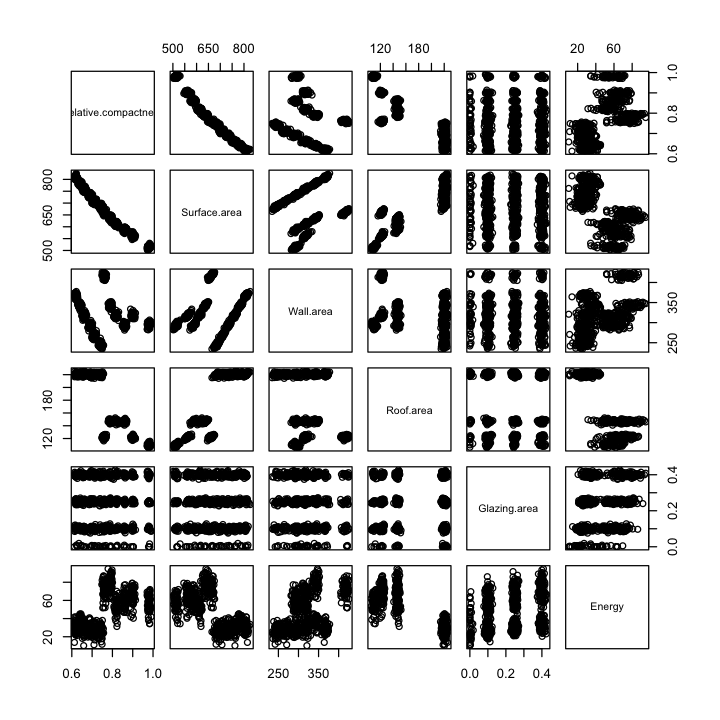

In [16]:
options(repr.plot.width = 6, repr.plot.height = 6)
pairs(x[,-c(5,6,8,10,11)])

On remarque une relation linéaire entre Relative.compactness et Surface.area

On voit que Glazing.area, qui est une variable quantitative, est finalement répartie selon 4 intervalles.

In [17]:
fig <- plot_ly(x, x = ~Roof.area, y = ~Wall.area, z = ~Surface.area, color = ~Energy.efficiency)
fig <- fig %>% add_markers()
fig <- fig %>% layout(scene = list(xaxis = list(title = 'Roof Area'),
                     yaxis = list(title = 'Wall Area'),
                     zaxis = list(title = 'Surface Area')))

fig

Warning message:
“`arrange_()` is deprecated as of dplyr 0.7.0.
Please use `arrange()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”

HTML widgets cannot be represented in plain text (need html)

In [18]:
## On vérifie la relation Surface.area = Wall.area + 2*Roof.area
a=x$Surface.area-(x$Wall.area+2*x$Roof.area)
cat("Nombre de valeurs pour lesquelles la relation 'Surface.area = Wall.area + 2*Roof.area' n'est pas vérifié : ", length(which(round(a,3)!=0)))

Nombre de valeurs pour lesquelles la relation 'Surface.area = Wall.area + 2*Roof.area' n'est pas vérifié :  0

La surface est calculée en sommant la surface des murs et en ajoutant deux fois la surface du toit.

La relation étant vérifiée pour tous les points de notre jeu de donnée, nous allons pouvoir supprimer une ou plusieurs variables étant donné que les informations sont redondantes.

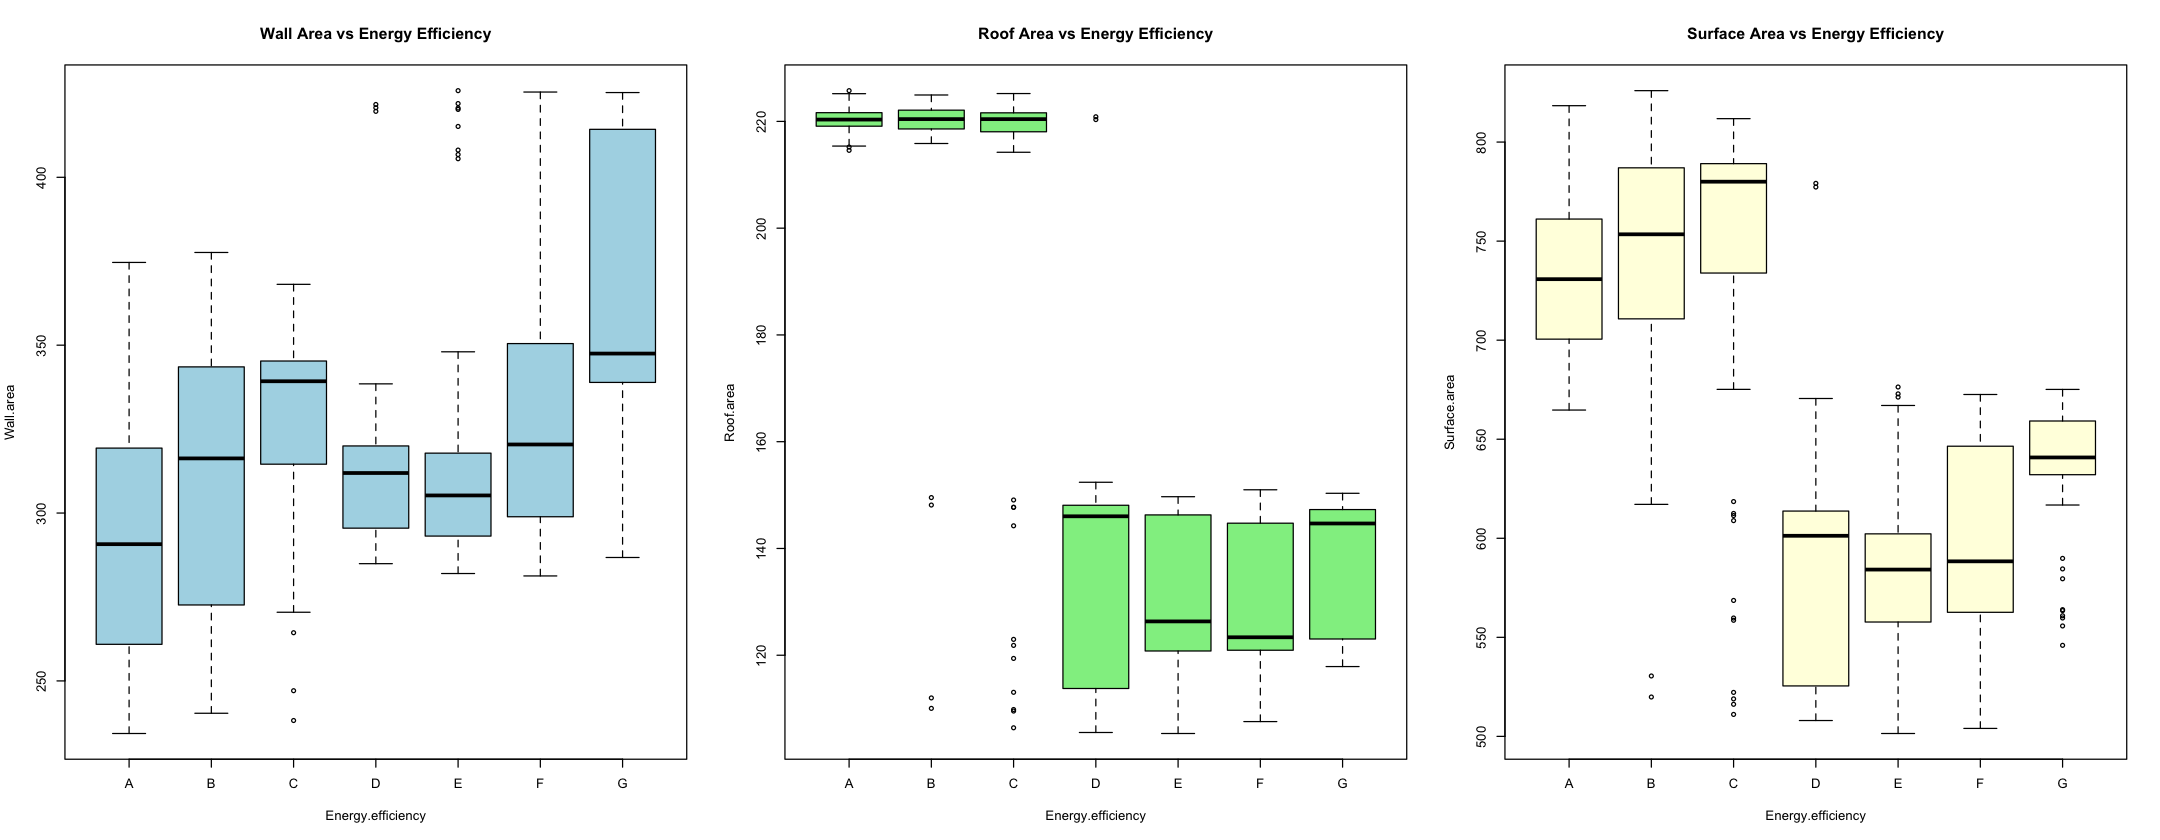

In [19]:
options(repr.plot.width = 18, repr.plot.height = 7) 

par(mfrow=c(1,3))
boxplot(Wall.area ~Energy.efficiency, data=x, col='lightblue', main="Wall Area vs Energy Efficiency")
boxplot(Roof.area ~Energy.efficiency, data=x, col='lightgreen', main="Roof Area vs Energy Efficiency")
boxplot(Surface.area ~Energy.efficiency, data=x, col='lightyellow', main="Surface Area vs Energy Efficiency")


On remarque sur ces graphiques que les classes A, B et C ont une surface de toît élevée. De la même façon, ces classes ont une surface totale élevée.

La tendance est inversée pour les classes D, E, F et G.


Pour continuer l'analyse, on va donc supprimer la variable **Roof Area**, d'une part car son information est contenue dans la variable **Surface Area** et d'autre part car sa distribution est inéquitablement répartie.

**On retire donc la variable Roof Area.**

In [20]:
x <- dplyr::select(x,-Roof.area)
head(x)

Relative.compactness Surface.area Wall.area Overall.height orientation
1 0.9829276            530.4900     306.4846  7              North      
2 0.9835473            519.8724     299.7763  7              East       
3 0.9794535            516.1912     303.3744  7              South      
4 0.9777325            518.9241     292.8122  7              West       
5 0.9030294            552.9689     316.2361  7              North      
6 0.8909102            558.6037     314.9162  7              East       
  Glazing.area Glazing.area.distr Energy   Energy.efficiency
1 1.609490e-02 No Glazing         34.26394 B                
2 0.000000e+00 No Glazing         34.58975 B                
3 0.000000e+00 No Glazing         38.77805 C                
4 9.554434e-06 No Glazing         37.94781 C                
5 0.000000e+00 No Glazing         47.67586 D                
6 0.000000e+00 No Glazing         41.90847 C

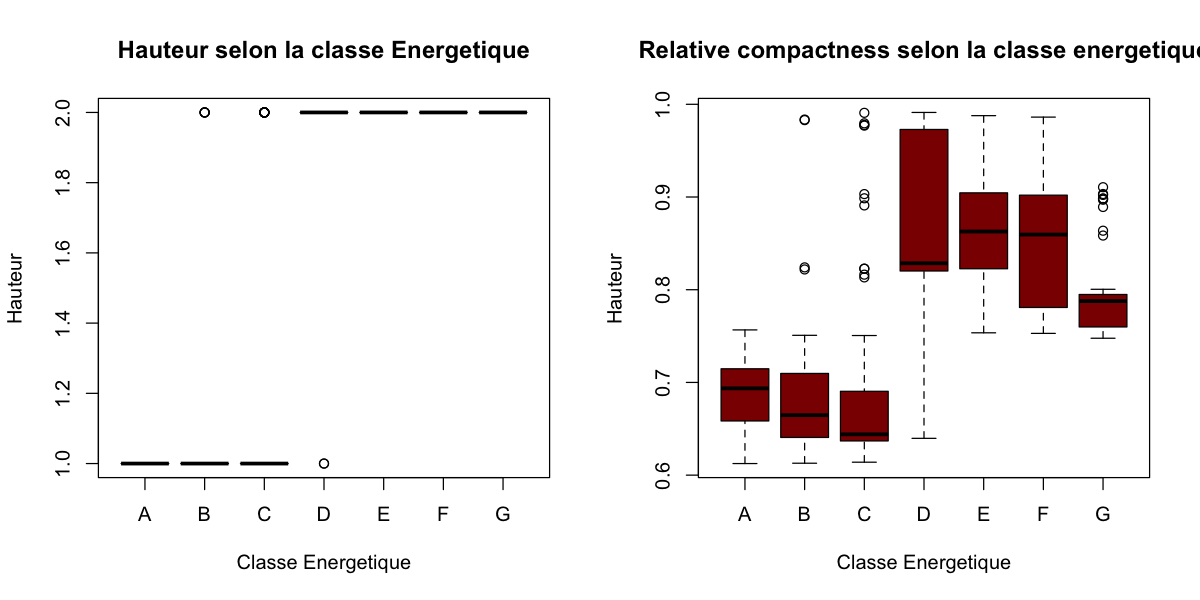

In [21]:
options(repr.plot.width = 10, repr.plot.height = 5) 

par(mfrow=c(1,2))
boxplot(x$Overall.height~ x$Energy.efficiency, main ="Hauteur selon la classe Energetique", xlab="Classe Energetique", ylab="Hauteur",col='red')
boxplot(x$Relative.compactness~ x$Energy.efficiency, main ="Relative compactness selon la classe energetique", xlab="Classe Energetique", ylab="Hauteur",col='darkred')


On remarque sur le graphique de gauche que les classes A, B et C ont majoritairement une hauteur de 3m50 tandis que les classes D, E, F et G ont principalement une hauteur plus élevé (7m).

De la même façon, on remarque que la valeur de Relative Compactness est plus faible pour les bonnes classes énergetiques par rapport aux moins bonnes.

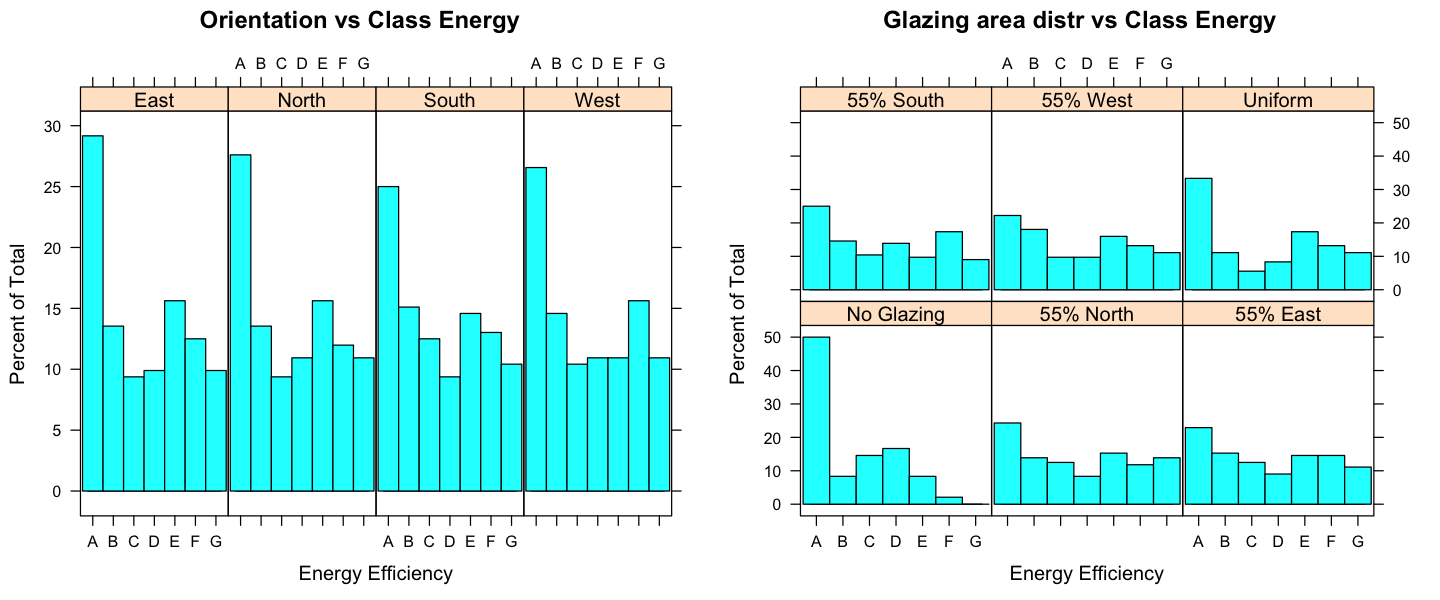

In [22]:
options(repr.plot.width = 12, repr.plot.height = 5) 
h1 = histogram(~Energy.efficiency | orientation , data=x, xlab= "Energy Efficiency",main="Orientation vs Class Energy",)
h2 = histogram(~Energy.efficiency | Glazing.area.distr, data=x,main="Glazing area distr vs Class Energy", xlab= "Energy Efficiency")
grid.arrange(h1, h2, nrow=1, ncol=2)
#histogram(~orientation | Energy.efficiency , data=x, xlab= "Energy Efficiency",main="Orientation vs Class Energy",)
#mosaicplot(table2, main="Glazing area distr vs Class Energy")

Les classes d'énergie sont uniformement réparties selon l'orientation du bâtiment et selon l'orientation des vitrages. L'orientation des bâtiments n'influe donc probablement pas l'appartenance à une certaine classe d'énergie.

En revanche, lorsqu'il y a pas de vitrage, la classe A est clairement majoritaire. On peut faire le lien avec la réalité où on suppose qu'un batiment sans vitrage est mieux isolé.

### 3. Analyse en Composantes Principales

On enlève la variable Energy car c'est celle qu'on veut prédire.
On garde seulement les variables quantitatives.


**Remarque :** Les variables n'étant pas dans les mêmes unités, nous faisons une ACP centrée réduite.

In [23]:
X_acp <- dplyr::select(x,c(Relative.compactness, Surface.area, Wall.area, Glazing.area,Energy.efficiency))
res.pca <- PCA(X_acp, scale.unit=TRUE, quali.sup=5, graph = FALSE)

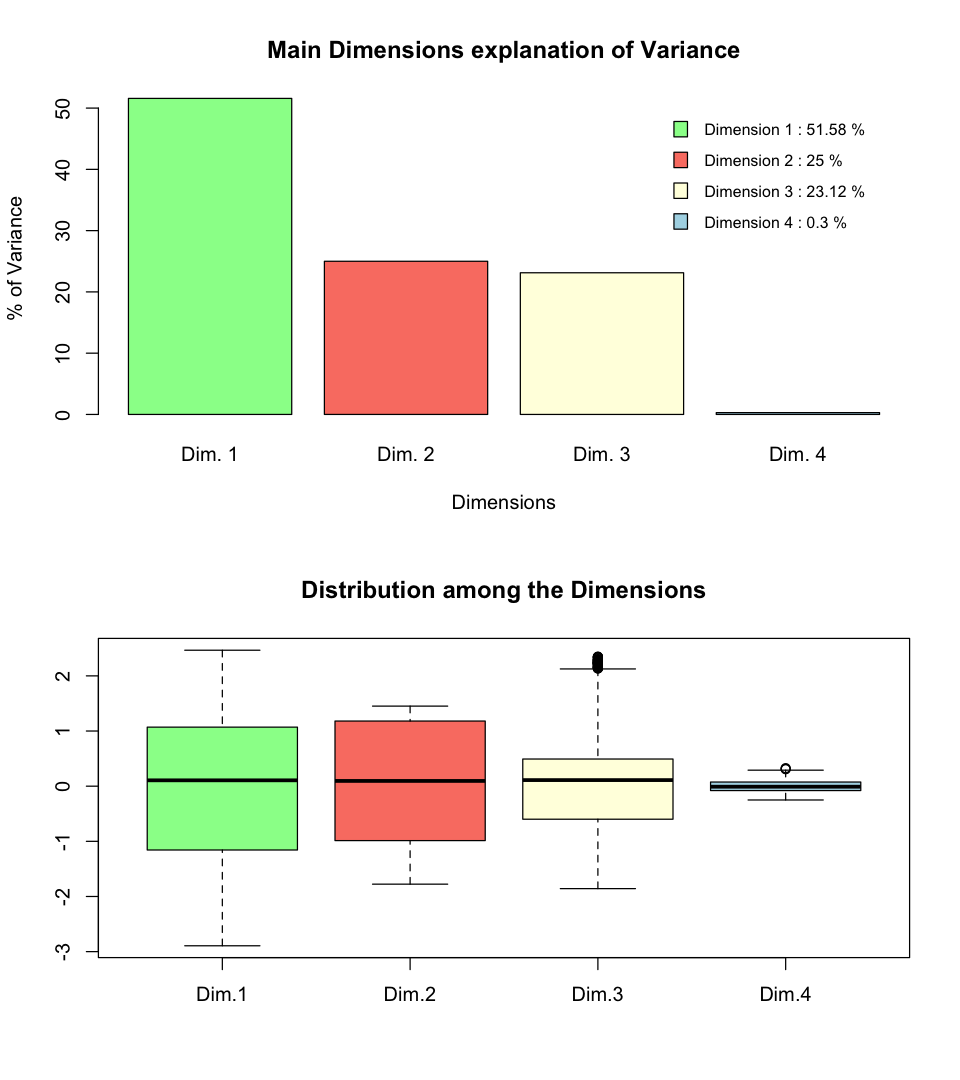

In [24]:
#fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50), new.plot=FALSE, graph.type="classic")
lbls = paste("Dimension",1:4, ":", round(res.pca$eig[,2],2), "%" )
coul = c('palegreen','salmon','lightyellow','lightblue','black')
options(repr.plot.width = 8, repr.plot.height = 9) 
par(mfrow=c(2,1))
barplot(res.pca$eig[,2],names.arg=paste("Dim.",1:nrow(res.pca$eig)), xlab="Dimensions", ylab = "% of Variance", col = coul,main="Main Dimensions explanation of Variance")
legend(x='topright',legend=lbls, fill= coul, bty='n', cex=0.8, text.font=0.5)
boxplot(res.pca$ind$coord, outlier=TRUE, col=coul, main = "Distribution among the Dimensions")

Au vu du pourcentage de variance expliqué et des ditributions des trois premières dimensions, nous sommes tentés de les garder.

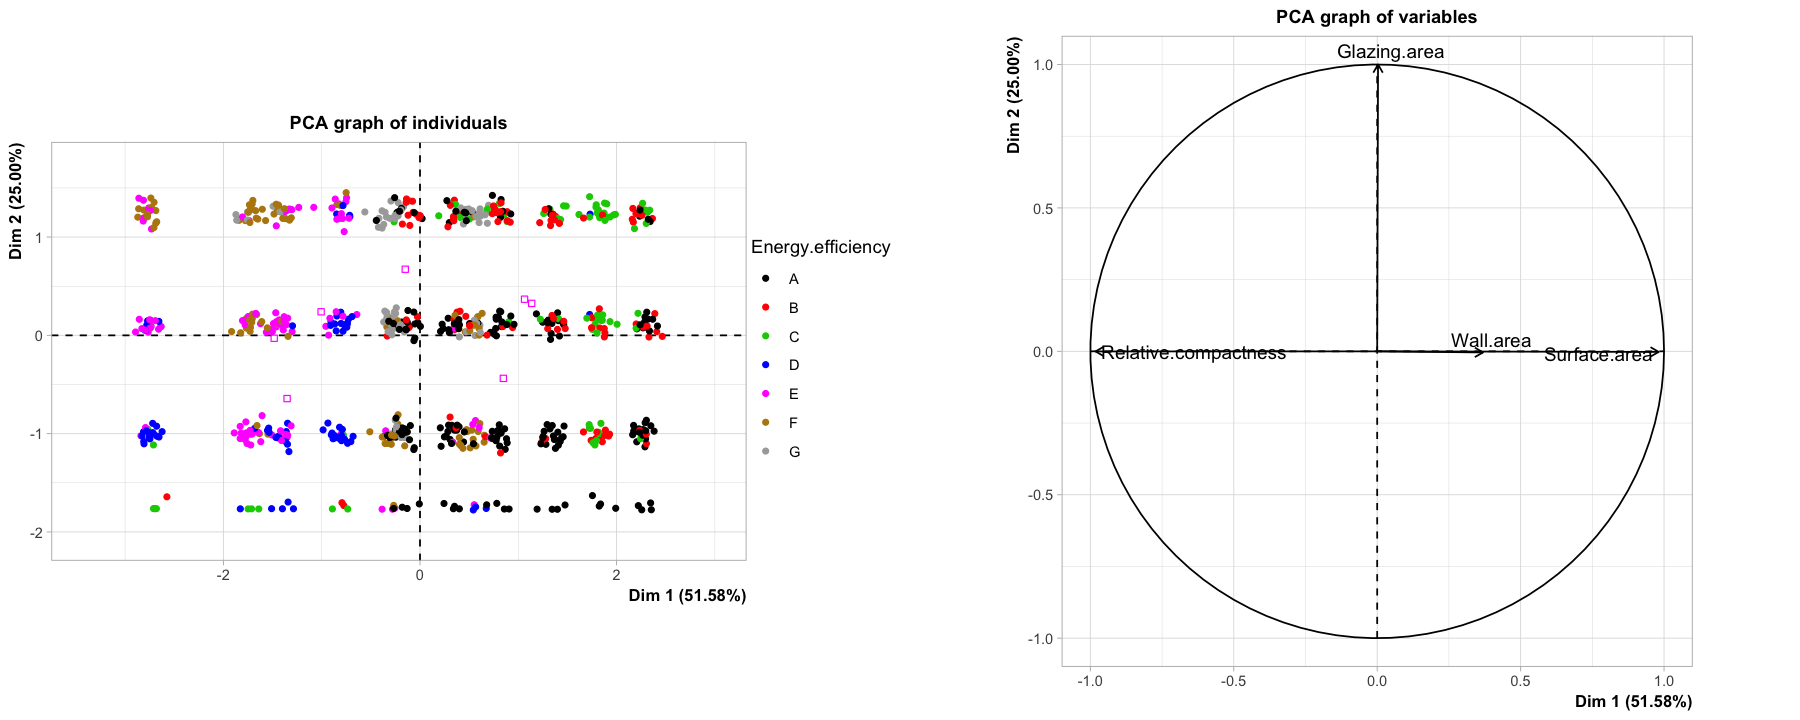

In [25]:
options(repr.plot.width = 15, repr.plot.height = 6) 
plot1 <- plot(res.pca,choix="ind", label="none", new.plot=FALSE, graph.type="ggplot",habillage=5)
plot2 <- plot(res.pca,choix="var", new.plot=FALSE, graph.type="ggplot")
grid.arrange(plot1, plot2, nrow=1, ncol=2)

**Interprétation** :

On observe des clusters dans le graphe des individus qui ne reflètent pas exactement les classes. Cependant On peut séparer les "bonnes classes" (A, B et C) des moins bonnes classes (D,E,F et G) par la première composante principale. En effet, les "bonnes classes" semblent se distinguer des "mauvaises classes", par une valeur positive sur l'axe 1. Ce dernier étant porté par Surface Area positivement et par Relative Compactness négativement.


La dimension 2 est principalement porté par **Glazing Area**. On ne distingue pas les différentes classes grâce à cette composante (et donc à cette variable).

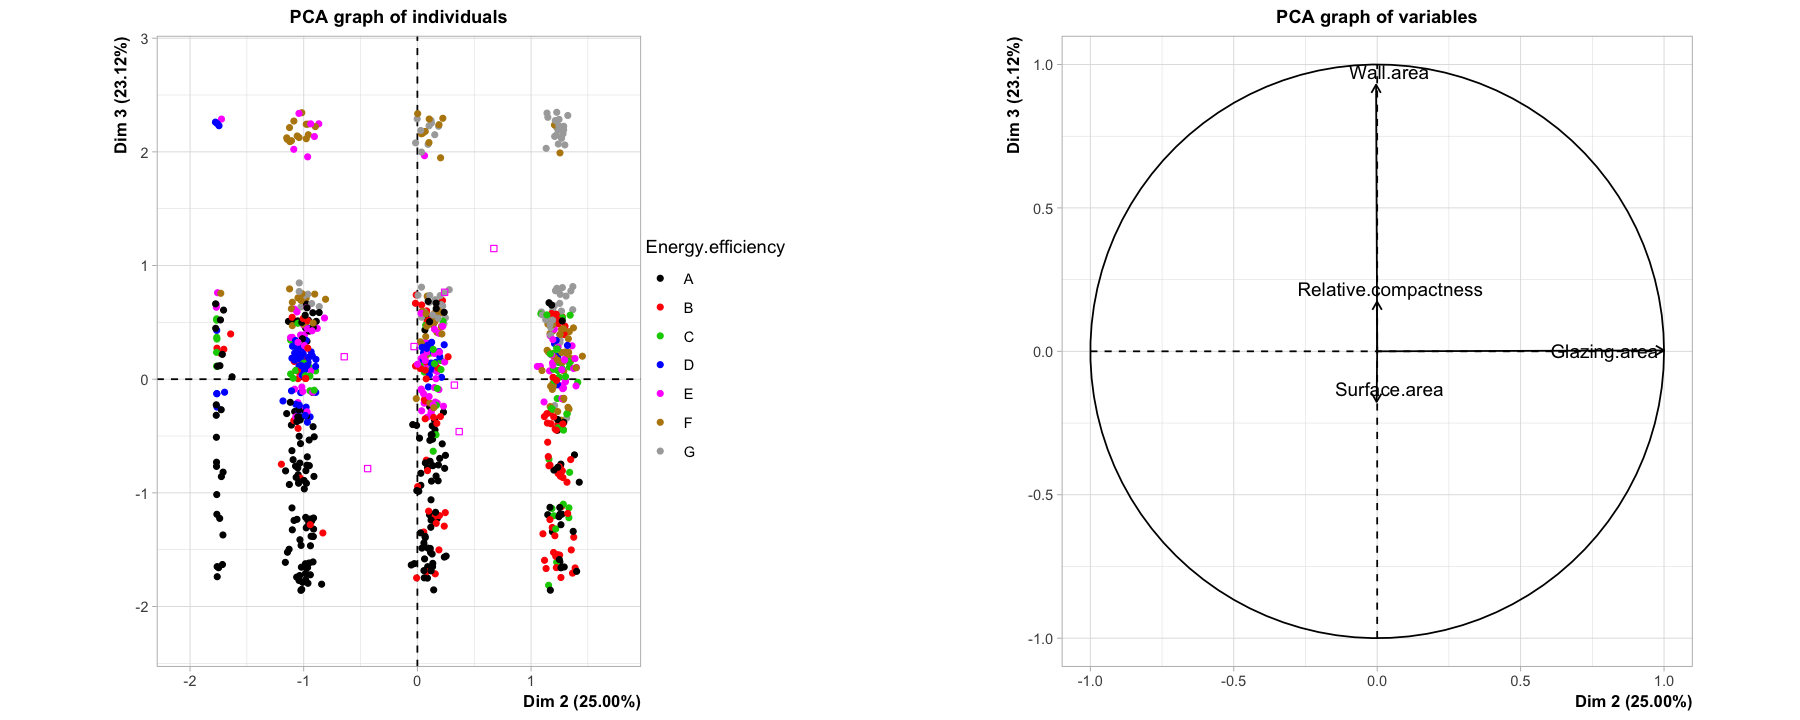

In [26]:
options(repr.plot.width = 15, repr.plot.height = 6) 
plot3 <- plot(res.pca,axes=c(2,3),choix="ind", label="none", new.plot=FALSE, graph.type="ggplot",habillage=5)
plot4 <- plot(res.pca,axes=c(2,3),choix="var", new.plot=FALSE, graph.type="ggplot")
grid.arrange(plot3, plot4, nrow=1, ncol=2)

On remarque encore ici des clusters selon l'axe 2; ces derniers sont sans doute dus à la variable Glazing Area qui est disparate comme nous l'avons souligné précedemment. 

On distingue tout de même que les bonnes classes ont tendance à avoir une valeur négative sur l'axe 3, porté par **Wall Area**. La variable Wall Area permet sans doute elle aussi de distinguer certaines classes, plus Wall Area est faible, plus la classe Energétique est bonne.

Les conclusions de l'ACP correspondent aux caractéristiques montrées précedemment sur l'impact de certaines variables sur la consomation Energetique.

### 4. Clustering 

In [27]:
### k-means avec 7 clusters
x_num=dplyr::select(x, Relative.compactness, Wall.area,Surface.area, Glazing.area)
x_num_cr=scale(x_num)

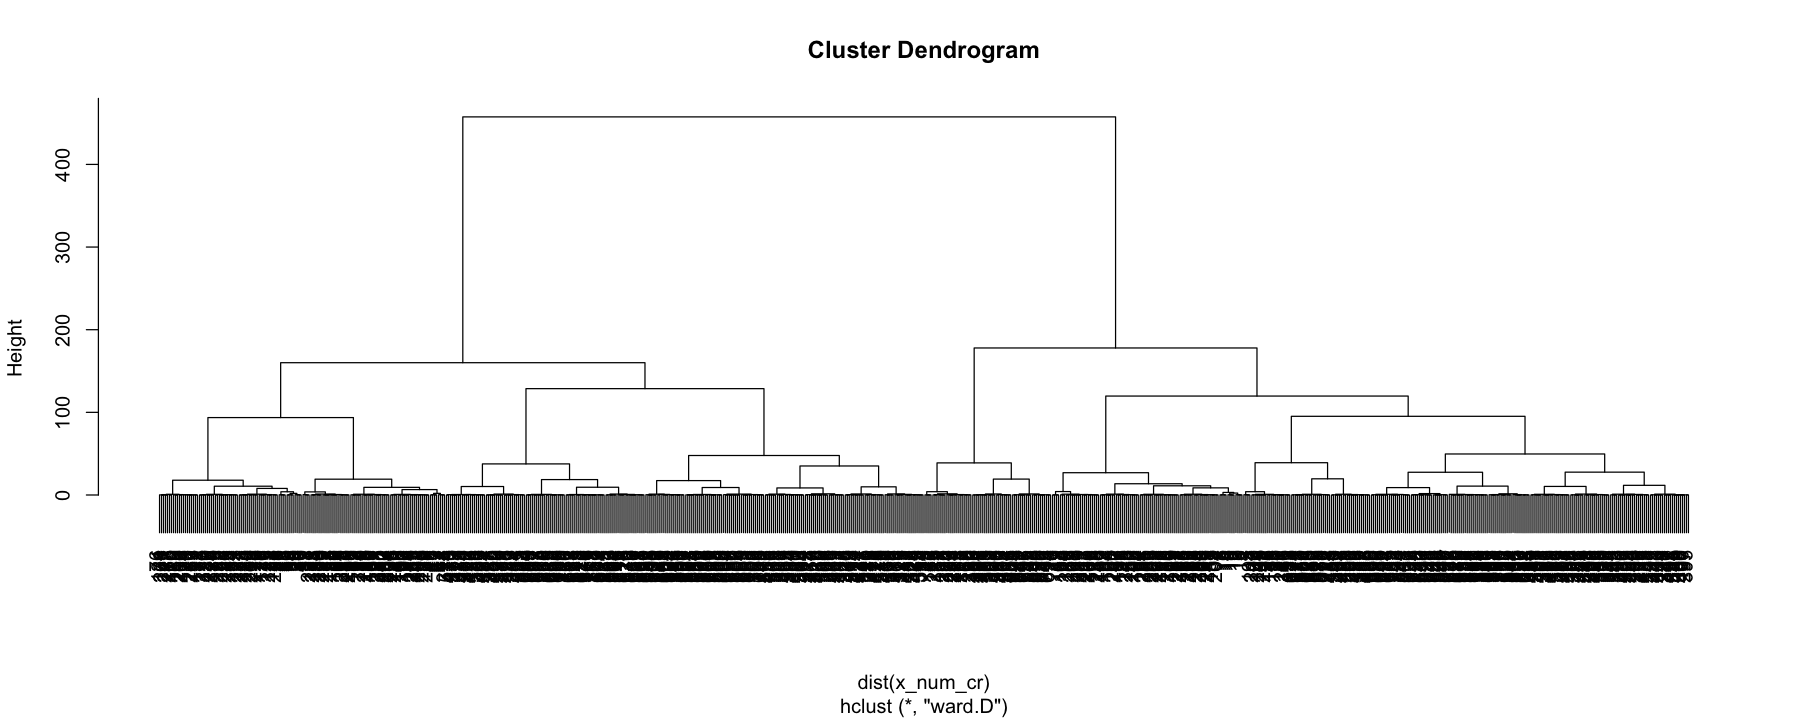

In [28]:
stacked_cluster = hclust(dist(x_num_cr), method = "ward.D")
plot(stacked_cluster)

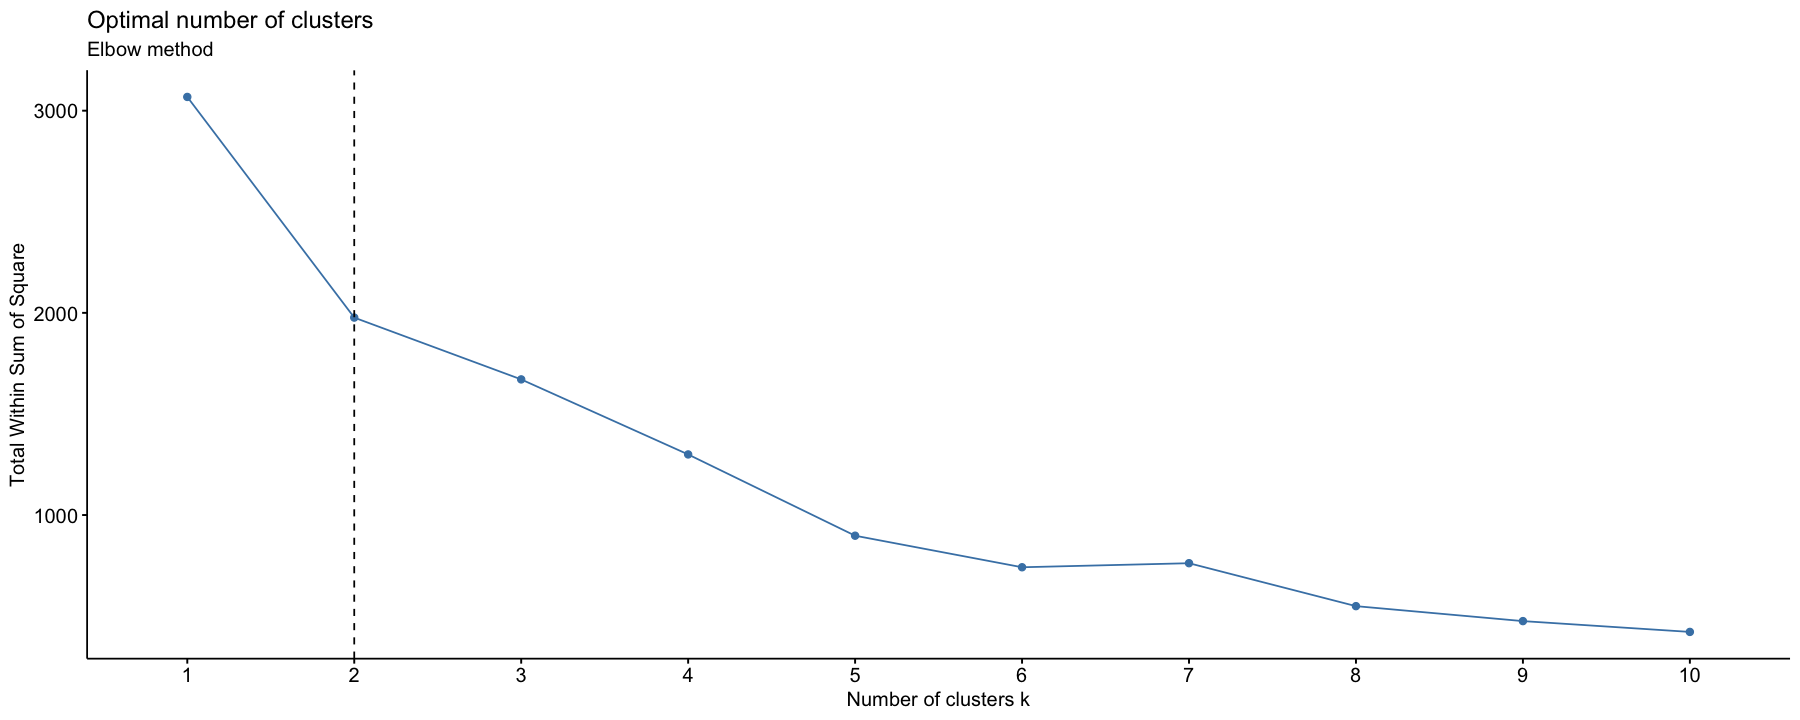

In [28]:
# Elbow method
fviz_nbclust(x_num_cr, kmeans, method = "wss") +
    geom_vline(xintercept = 2, linetype = 2)+
  labs(subtitle = "Elbow method")

Ces deux méthodes nous suggèrent 2 clusters, or on aimerait qu'il y en ai 7 (correspondant aux 7 classes énergétiques)

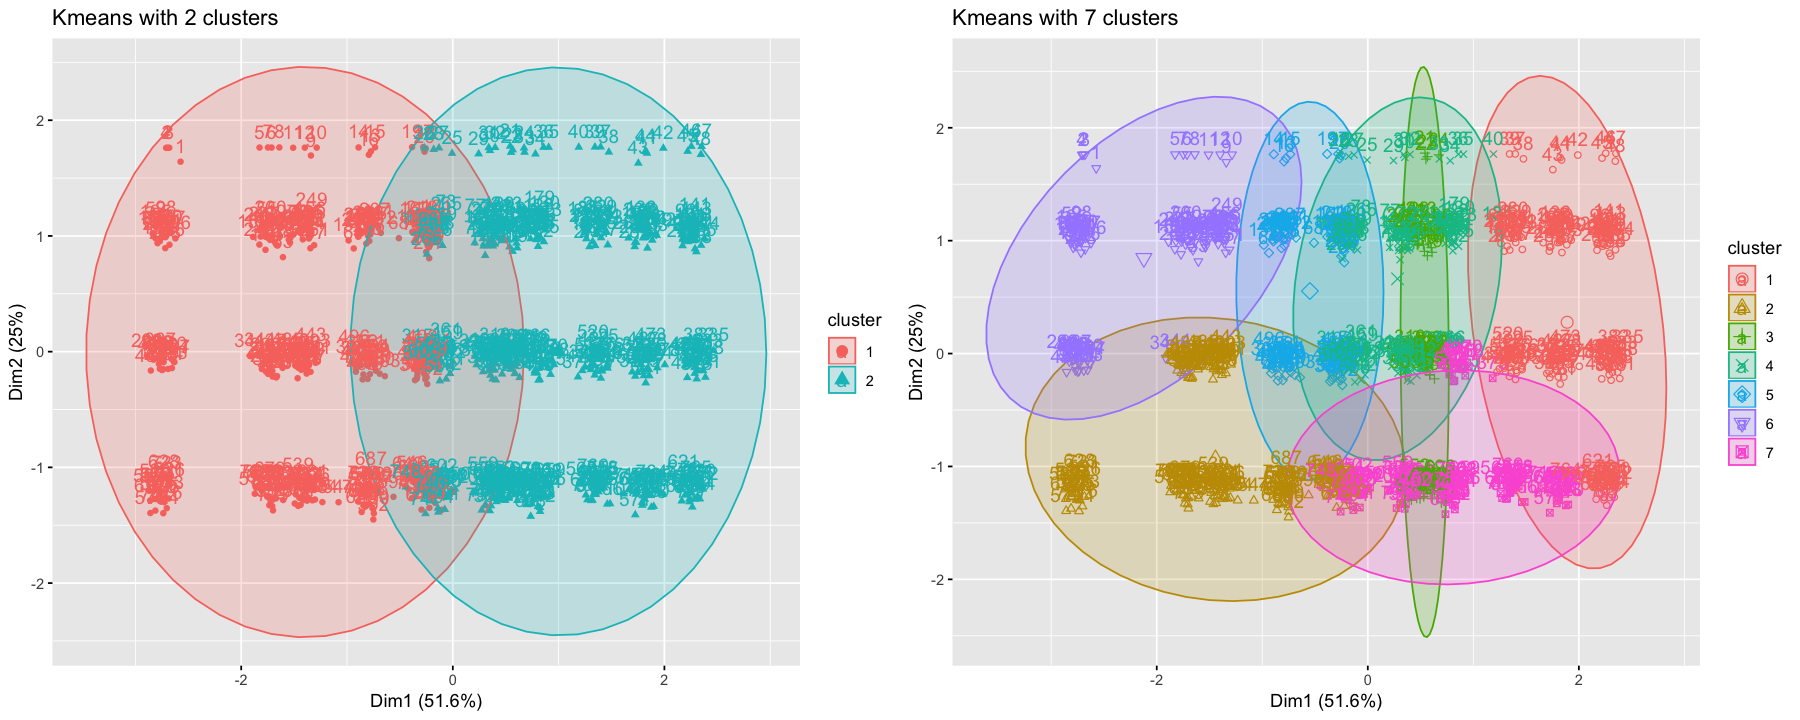

In [29]:
set.seed(10)
km.out2 = kmeans(x_num_cr,centers=2)
km.out7 = kmeans(x_num_cr,centers=7)
plot.kmean2<-fviz_cluster(km.out2, x_num_cr, ellipse.type = "norm", main='Kmeans with 2 clusters')
plot.kmean7<-fviz_cluster(km.out7, x_num_cr, ellipse.type = "norm", main='Kmeans with 7 clusters')
grid.arrange(plot.kmean2, plot.kmean7, nrow=1, ncol=2)

In [30]:
cat('Table de contingence avec 2 clusters :')

print(table(km.out2$cluster,x$Energy.efficiency))

cat(' \n\n ')
cat('Table de contingence avec 7 clusters :')
print(table(km.out7$cluster,x$Energy.efficiency))

Table de contingence avec 2 clusters :   
      A   B   C   D   E   F   G
  1   0   4  11  74 101  77  53
  2 208 105  69   5   8  25  28
 

 Table de contingence avec 7 clusters :   
      A   B   C   D   E   F   G
  1  69  45  38   1   0   0   0
  2   0   0   0   5  49  55  29
  3   0   0   0   3   8  25  28
  4 104  16   0   0   0   0   0
  5   0   2   4  31  11  16  24
  6   0   2   7  38  41   6   0
  7  35  44  31   1   0   0   0


kmeans ne semble pas adapté à notre problème. Cependant, cet algorithme suggère de regrouper les classes A,B et C ensemble ainsi que D,E,F,G (bonne consommation et mauvaise consommation).

**Pour la suite, il va donc sembler intéressant de faire un premier algorithme réalisant une regresion logistique binaire : Bonne consommation Energétique (A,B,C) vs Mauvaise Consommation Energétique (D,E,F,G) puis, sur ces nouveaux sous-datasets prédits, de mettre en place un modèle de prédiction plus fin.**

## B. Séparation des données :

On sépare les données en un ensemble d'apprentissage (train) et un ensemble test. Le modèle est entrainé sur l'échantillon train et il est évalué sur l'échantillon test.

Cette étape est nécessaire pour permettre d'évaluer le modèle déterminé avec les échantillons d'entrainement. En effet, on peut par exemple détecter un overfitting grâce à l'échantillon test (un très bon score avec l'échantillon d'entrainement ne signifie pas toujours que c'est un très bon modèle).

In [31]:
## 75% of the sample size
train_ratio=0.7
smp_size <- floor(train_ratio * nrow(x))

## set the seed to make your partition reproducible
set.seed(2512)
train_ind <- sample(seq_len(nrow(x)), size = smp_size)

train <- x[train_ind, ]
test <- x[-train_ind, ]

In [32]:
cat("Nombre d'individus dans l'échantillon train : ", nrow(train), '\n')
cat("Nombre d'individus dans l'échantillon test : ", nrow(test))

Nombre d'individus dans train :  537 
Nombre d'individus dans test :  231

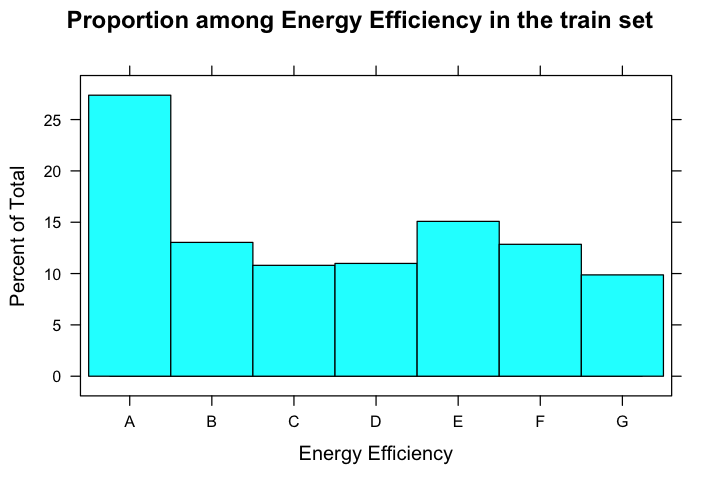

In [33]:
options(repr.plot.width =6, repr.plot.height = 4) 
histogram(train$Energy.efficiency, freq=FALSE, xlab="Energy Efficiency", 
          main="Proportion among Energy Efficiency in the train set")

On remarque une plus forte proportion d'individus de la classe A. Nos modèles auront donc tendance à être meilleurs pour la classe A. 

Heureusement, nous avons choisi des métriques de performance qui tiennent compte de ce fait.

## C. Modélisation


## Evaluation

**Pour évaluer les performances d'un modèle de classification, il faut définir des mesures traduisant son efficacité:**

Quatres scores ont été utilisées pour comparer les différents modèles :
* **Score accuracy** : Quotient entre les bien prédits et le nombre total de prédictions (fonction perf_model). Le défaut de cette première métrique est qu'elle ne prend pas en compte l'écart de classe quand on se trompe. En effet, imaginons que la vraie valeur soit la classe A ; l'erreur est bien plus grave si on prédit une consommation de type G que si l'on prédit une consommation de type B.

* **Root Mean Squared Error (RMSE)** : Uniquement utilisé dans le cadre de la régression

* **Mean Absolute Error (MAE)** : Cette métrique est obtenue en utilisant la formule trouvée dans le papier *Measuring the performance of ordinal classification* (Aime S. Cardoso & Ricardo Sousa).  Bien qu'associé en temps normal à des regréssions, cette mesure est ici adaptée pour prendre en compte les écart de classe lors d'une classification. (fonction MAE()). **Plus le score est faible, meilleur est la classification**. (La Mean Absolute Error correspond à l'opposé de l'accuracy qui serait pondérée selon l'erreur de classication. A ENLEVER ?)

* **Macro F1** calcule la métrique F1 pour chaque classe individuellement (comme pour une classification binaire où la valeur TRUE correspondrait à la classe que l'on souhaite prédire la valeur FALSE regrouperait toutes les autres classes.). On fait ensuite la moyenne de toutes ces mesures F1.
Il est important de noter que cette métrique ne tient pas en compte des classes non uniformément réparties.


**NB :** Nous gardons aussi toutes les valeurs individuelles de mesures F1 et nous les afficherons à la fin pour comparer nos modèles. Certaines méthodes (linéaire ou non-linéaires) seront en effet sans doutes meilleures pour prédire certaines classes que d'autres.
    
    
Toutes les métriques pour la multiclassification peuvent être trouvées ici :

https://blog.revolutionanalytics.com/2016/03/com_class_eval_metrics_r.html

http://www.inescporto.pt/~jsc/publications/journals/2011JaimeIJPRAI.pdf

In [34]:
## Définition des scores

perf_model <- function(table_contingence){
    return( sum(diag(table_contingence))/sum(table_contingence))
}

MAE <- function(table){
    lignes = nrow(table)
    cols = ncol(table)
    N = sum(table)
    MSE=0
    for (i in seq(1,lignes)){
        
        for (j in seq(1,cols)){
            
            MSE = MSE + (table[i,j]*abs(i-j))
            
        }
    }
    
 return(MSE/N)   
}

macro_F1 <- function(table){
    lignes = nrow(table)
    cols = ncol(table)
    diag = diag(table)
    rowsums = apply(table, 1, sum)   
    colsums = apply(table, 2, sum) 
    precision = diag / colsums 
    recall = diag / rowsums 
    f1 = 2 * precision * recall / (precision + recall)   
    
    return(f1)
}

In [35]:
#Definition des tableaux de score :
#Ces fonctions permettent de regrouper dans un tableau les différents scores pour chaque modèle
Tab_score_class = as.data.frame(setNames(replicate(4,numeric(0), simplify = F),
                                         c("Modele","Accuracy","MAE", "Macro F1") ))
Tab_score_reg = as.data.frame(setNames(replicate(5,numeric(0), simplify = F),
                                       c("Modele","Accuracy","MAE", "Macro F1","RMSE") ))

Tab_F1_class = as.data.frame(setNames(replicate(8,numeric(0), simplify = F),
                                         c("Modele","A","B","C","D","E","F","G") ))

Tab_F1_reg = as.data.frame(setNames(replicate(8,numeric(0), simplify = F),
                                         c("Modele","A","B","C","D","E","F","G") ))

#pred est la liste des prédictions sur le jeu de test
#quali est le type de la prediction

Compute_Error <- function(pred,quali=TRUE, name_model=""){ 
    
    if (quali){
        table_result = table(pred.reg = pred , observations = test$Energy.efficiency)
        cat("Table de contingence de", name_model, ": \n")
        print(table_result)
        score1 = perf_model(table_result)
        score2 = MAE(table_result)
        score3 = mean( macro_F1(table_result) )
        #on cree une df avec les mêmes noms de colonnes
        to_add <- data.frame(Modele=name_model, Accuracy=score1,MAE=score2, MacroF1=score3)
        Tab_score_class = rbind(Tab_score_class,to_add) # on concatène ensuite
        return(Tab_score_class)
    }
    else{
        pred_class <- classify(pred)   
        table_result = table(pred.reg = pred_class , observations = test$Energy.efficiency)
        cat("Table de contingende de", name_model, ": \n")
        print(table_result)
        score1 = perf_model(table_result)
        score2 = MAE(table_result)
        score3 = mean( macro_F1(table_result) )
        rmse = sqrt( sum( (pred - test$Energy)^2 ) /nrow(test) )
        #on cree une df avec les mêmes noms de colonnes
        to_add <- data.frame(Modele=name_model, Accuracy=score1,MAE=score2, MacroF1=score3, RMSE=rmse) 
        Tab_score_reg = rbind(Tab_score_reg,to_add) # on concatène ensuite
        return(Tab_score_reg)        
        
    }
}


Compute_F1 <- function(predict,quali=TRUE, name_model=""){
    
    if (quali){
        table_result = table(pred.reg = predict , observations = test$Energy.efficiency)
        temp = macro_F1(table_result)
        add_F1= data.frame(Modele = name_model,"A"= temp[[1]],"B"= temp[[2]], "C"= temp[[3]], "D"=temp[[4]],
                           "E"=temp[[5]],"F"=temp[[6]],"G"=temp[[7]])
        
        
        Tab_F1_class = rbind(Tab_F1_class,add_F1)
        return(Tab_F1_class)

    }    
    else{
        pred_class <- classify(predict)   
        table_result = table(pred.reg = pred_class , observations = test$Energy.efficiency)
        temp = macro_F1(table_result)
        add_F1= data.frame(Modele=name_model,"A"=temp[1],"B"=temp[2], "C"=temp[3], "D"=temp[4],
                           "E"=temp[5],"F"=temp[6],"G"=temp[7])
        
        Tab_F1_reg = rbind(Tab_F1_reg,add_F1)
        return(Tab_F1_reg)
    }   
}

## 1) Premier point de vue :  Classification

Dans cette partie, on s'interesse uniquement au problème de classification. En effet, on souhaite prédire la classe énergétique de chaque individu. On enlève donc la variable Energy dans cette partie.

In [36]:
train_class <- dplyr::select(train,-Energy)
test_class <- dplyr::select(test, -Energy)

In [37]:
x_train_class<-dplyr::select(train_class, -Energy.efficiency)
y_train_class<- train_class$Energy.efficiency

x_test_class<-dplyr::select(test_class,-Energy.efficiency)
y_test_class<-test_class$Energy.efficiency

### a) Régression Logistique Polythomiale : 

Nous allons réaliser une régression logistique polynomial ordonnée aussi appelée "polythomial regression".

Il y a deux moyens de le réaliser : additive logits and adjacents logits.

**Mise en place du modèle:**

In [38]:
#Additive Simple: 
vglm.c <- vglm(Energy.efficiency ~., data=train_class, family=cumulative(parallel=T, reverse=F))

**Résultats :**

In [39]:
p <- predict(vglm.c, newdata = test_class, type = "response") #matrice de proba d'appartenance à chaque classe
vglm.c.pred <- apply(p,1, which.max) 


Tab_score_class <-Compute_Error(vglm.c.pred,quali=TRUE,name_model = "Naive Logit");Tab_score_class
Tab_F1_class <- Compute_F1(vglm.c.pred,quali=TRUE,name_model = "Naive Logit")


Table de contingence de Naive Logit : 
        observations
pred.reg  A  B  C  D  E  F  G
       1 54 18  5  0  0  0  0
       2  2 11  8  0  0  0  0
       3  5  8  6  1  0  0  0
       4  0  2  3  8  6  0  0
       5  0  0  0  7 13 13  3
       6  0  0  0  2  9 13 10
       7  0  0  0  2  0  7 15


Modele      Accuracy  MAE       MacroF1 
1 Naive Logit 0.5194805 0.5714286 0.459497

**Commentaire :** 

Le score de classification est relativement faible, mais il n'est pas mauvais. On remarque par ailleurs que les erreurs de classification sont majoritairement dans les classes voisines. Ce résultat n'est pas choquant et c'est un bon début. Dans la partie suivante, nous allons essayer de pénaliser cette régression. 

### b) Regression Logistique Pénalisée : 

**Mise en place du modèle :**

[1] "Estimation CV de lambda :  0.001"

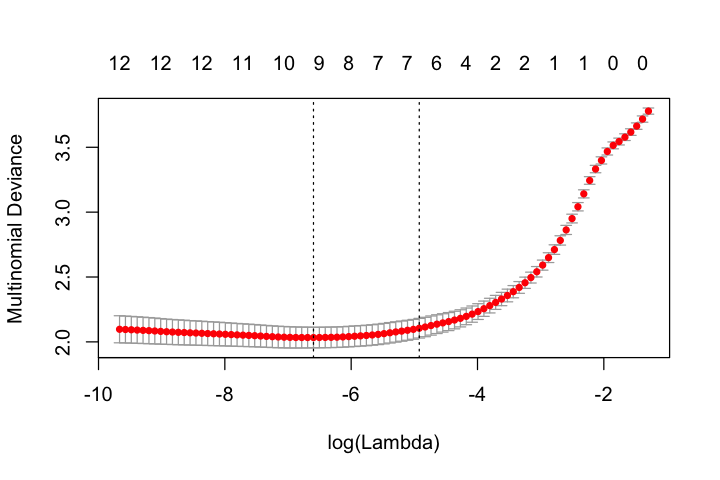

In [40]:
x.mat.train <- model.matrix(Energy.efficiency ~ . , data = train_class) #permet de gérer les variables catégorielles
#lasso.c <- glmnet(y = y_train_class, x = x.mat.train,family="multinomial")
lasso.c.cv <- cv.glmnet(y = y_train_class, x = x.mat.train,family="multinomial")
plot(lasso.c.cv)
paste("Estimation CV de lambda : ", round(lasso.c.cv$lambda.min,3))

**Résultats :**

In [41]:
x.mat.test <- model.matrix(Energy.efficiency ~ ., data = test_class)
lasso.c.cv.pred <- predict(lasso.c.cv,s="lambda.min", newx = x.mat.test,type="class") #valeur predite sur le jeu de train
Tab_score_class <-Compute_Error(lasso.c.cv.pred,quali=TRUE,name_model = "Penalised Logit");Tab_score_class
Tab_F1_class <- Compute_F1(lasso.c.cv.pred,quali=TRUE,name_model = "Penalised Logit")

Table de contingence de Penalised Logit : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 52 21  5  0  0  0  0
       B  7  7  6  0  0  0  0
       C  2  8  8  0  0  0  0
       D  0  3  3 10  7  4  1
       E  0  0  0  6 10  6  6
       F  0  0  0  2  7 13  5
       G  0  0  0  2  4 10 16


Modele          Accuracy  MAE       MacroF1  
1 Naive Logit     0.5194805 0.5714286 0.4594970
2 Penalised Logit 0.5021645 0.6363636 0.4465665

**Commentaires :**

Nous voyons donc que la pénalisation n'apparait pas comme une solution pour améliorer notre problème de classification. Essayons maintenant des méthodes non-linéaires.

### c) Arbre de regression : 

**Mise en place du modèle Optimisé:**

cp opti : 0.001601282

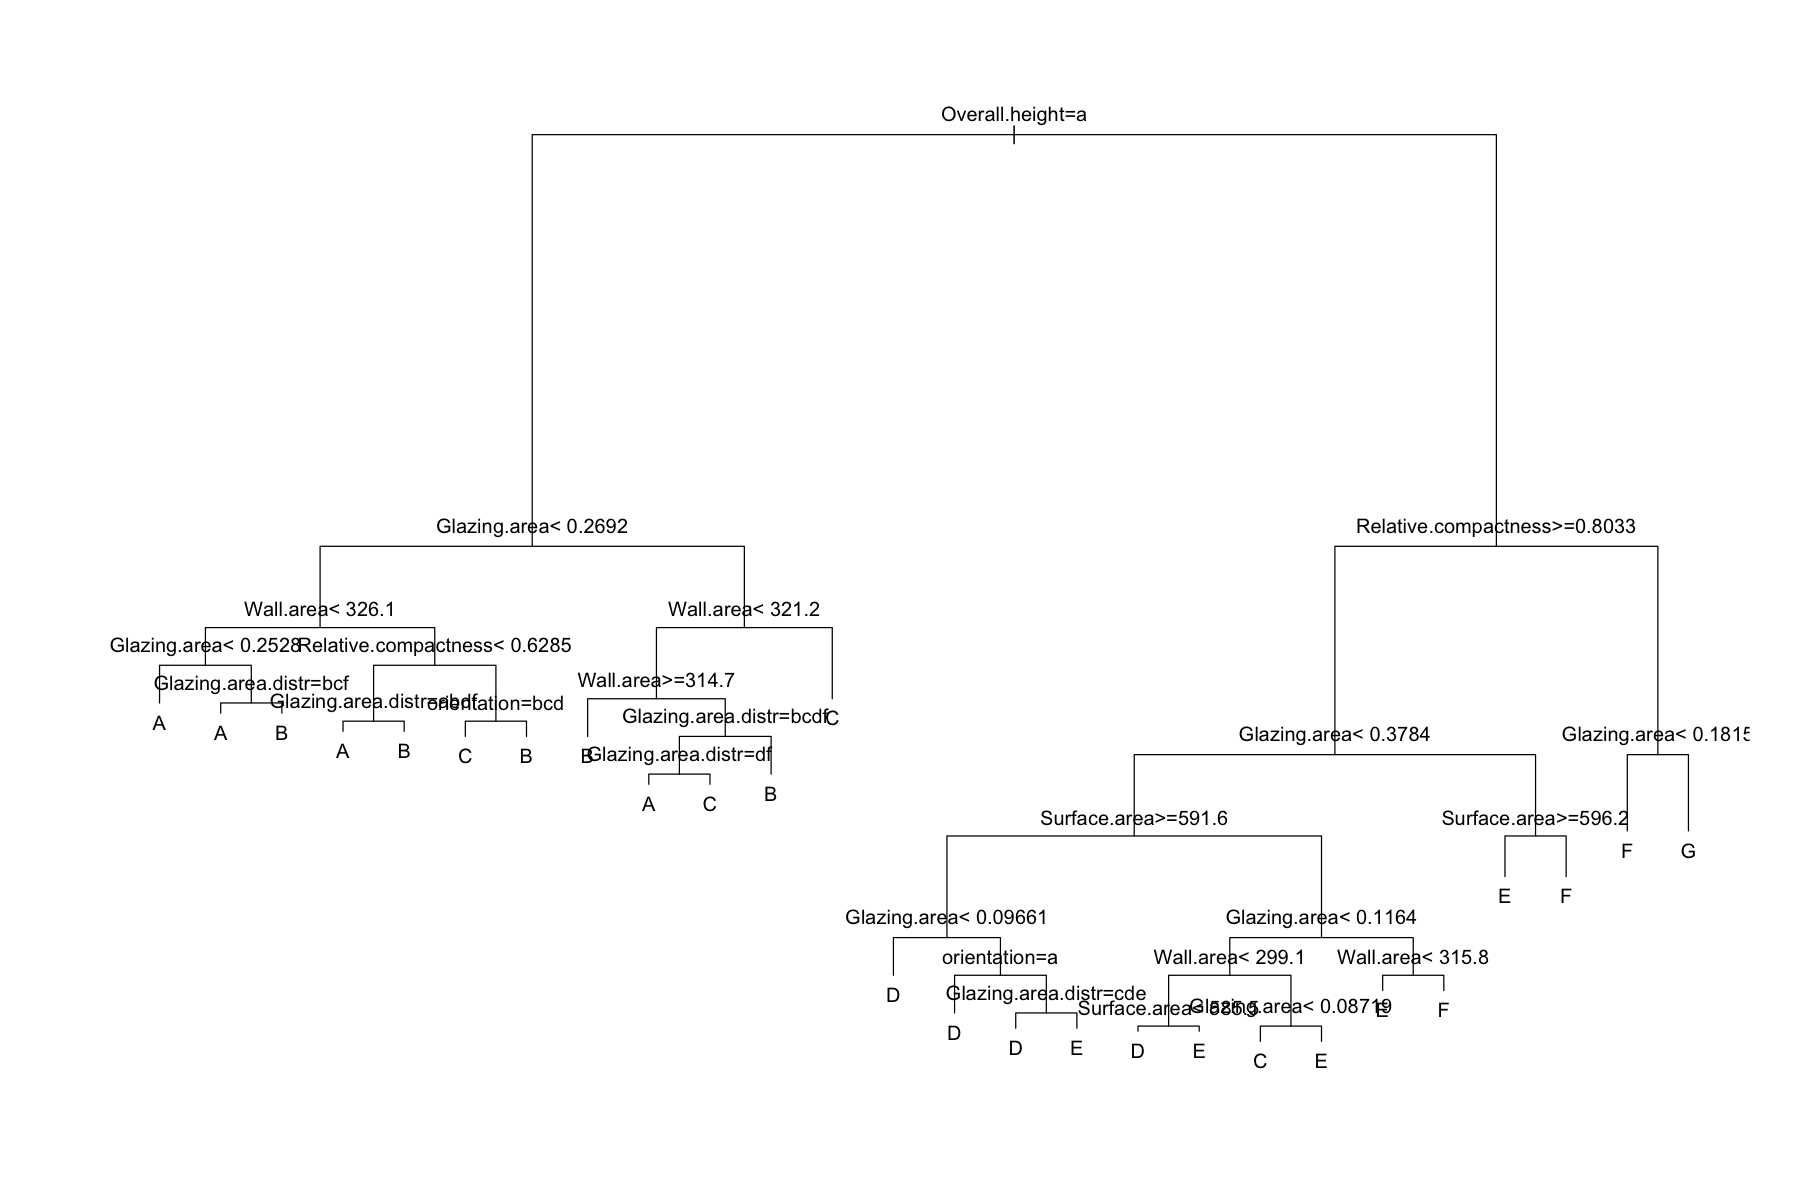

In [42]:
options(repr.plot.width = 15, repr.plot.height = 10)
tree.c=rpart(Energy.efficiency~.,data=train_class,control=rpart.control(cp=0.001))
xmat=xpred.rpart(tree.c, xval = 10)
#levels(datappr[,"Survived"]) <- c(1,2)
xerr <- (xmat-as.numeric(y_train_class))^2
CVerr=apply(xerr,2,sum)
cp_opti = as.numeric(attributes(which.min(CVerr))$names); 
cat('cp opti :', cp_opti)

tree.c.opti=rpart(Energy.efficiency~.,data=train_class,control=rpart.control(cp=cp_opti))
options(repr.plot.width = 15, repr.plot.height = 10)
plot(tree.c.opti)
text(tree.c.opti)

**Commentaire :**
On remarque que la variable Overall.height permet déja de classifier les extrêmes (classe A,B vs D,E,F,G), la délimitation dela classe C n'étant pas aussi nette.

**Résultats :**

In [43]:
tree.c.opti.reg <- predict(tree.c.opti, newdata = test_class, type = "class")
Tab_score_class <-Compute_Error(tree.c.opti.reg,quali=TRUE,name_model = "Tree opti");Tab_score_class
Tab_F1_class <- Compute_F1(tree.c.opti.reg,quali=TRUE,name_model = "Tree Opti")

Table de contingence de Tree opti : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 48 10  1  0  0  0  0
       B  8  7  4  0  0  0  0
       C  5 20 15  0  0  0  0
       D  0  2  2 15  2  1  0
       E  0  0  0  4 12  5  0
       F  0  0  0  1 14 18  7
       G  0  0  0  0  0  9 21


Modele          Accuracy  MAE       MacroF1  
1 Naive Logit     0.5194805 0.5714286 0.4594970
2 Penalised Logit 0.5021645 0.6363636 0.4465665
3 Tree opti       0.5887446 0.4545455 0.5638029

**Commentaire :**

L'apport de cette méthode est significatif car notre prédiction s'améliore pour chacune des métriques étudiées. L'utilisation de méthode non-linéaires semble pour l'instant être une bonne piste. Nous allons donc par la suite en étudier d'autres.
On se dirige donc vers un RandomForest qui devrait prodiguer d'encore meilleurs résultats.

### d) Random Forest : 

**Mise en place du modèle :**

In [44]:
rf.c<-randomForest::randomForest(x = x_train_class, y = y_train_class,
                         xtest = x_test_class, ytest = y_test_class,
                         importance = TRUE)

**Résultats :**

In [45]:
rf.c.pred <- rf.c$test$predicted
Tab_score_class <-Compute_Error(rf.c.pred,quali=TRUE,name_model = "Random Forest");Tab_score_class
Tab_F1_class <- Compute_F1(rf.c.pred,quali=TRUE,name_model = "RF");

Table de contingence de Random Forest : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 55 20  3  0  0  0  0
       B  6 11  6  0  0  0  0
       C  0  6 11  0  0  0  0
       D  0  2  2 14  2  0  0
       E  0  0  0  6 13  7  0
       F  0  0  0  0 13 16  4
       G  0  0  0  0  0 10 24


Modele          Accuracy  MAE       MacroF1  
1 Naive Logit     0.5194805 0.5714286 0.4594970
2 Penalised Logit 0.5021645 0.6363636 0.4465665
3 Tree opti       0.5887446 0.4545455 0.5638029
4 Random Forest   0.6233766 0.3982684 0.5929760

**Commentaire :** 
Nous remarquons dans un premier temps que le taux de classification est meilleur que tous celui obtenu avec l'arbre de décision.

Pour améliorer le taux de classification de Random Forest, nous pouvons essayer de modifier le paramètre __mtry__ correspondant au nombre de variables testées à chaque division.

Utilisons la librairie caret.


**Mise en place du modèle optimisé :**

In [46]:
cvControl <- trainControl(method = "cv", number = 10)
mtryTrials <- train(x_train_class, y_train_class, method = "rf", tuneLength = 6,
               trControl = cvControl, trace = FALSE)
mtryTrials

Random Forest 

537 samples
  7 predictor
  7 classes: 'A', 'B', 'C', 'D', 'E', 'F', 'G' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 483, 483, 485, 482, 483, 483, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.6554400  0.5830507
  3     0.6442214  0.5705064
  4     0.6423683  0.5690544
  5     0.6368451  0.5619084
  6     0.6443250  0.5713786
  7     0.6387008  0.5650792

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

In [47]:
rf.c.opti <- randomForest::randomForest(x = x_train_class, y = y_train_class,
                         xtest = x_test_class, ytest = y_test_class,
                         mtry=mtryTrials$bestTune$mtry,importance = TRUE)

**Résultats du modèle optimisé :**

In [48]:
rf.c.opti.pred <- rf.c.opti$test$predicted
Tab_score_class <-Compute_Error(rf.c.opti.pred,quali=TRUE,name_model = "Random Forest Opti");Tab_score_class
Tab_F1_class <- Compute_F1(rf.c.opti.pred,quali=TRUE,name_model = "RF_Opti");

Table de contingence de Random Forest Opti : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 55 21  3  0  0  0  0
       B  6 12  7  0  0  0  0
       C  0  4 10  0  0  0  0
       D  0  2  2 14  2  0  0
       E  0  0  0  6 15  7  0
       F  0  0  0  0 11 14  4
       G  0  0  0  0  0 12 24


Modele             Accuracy  MAE       MacroF1  
1 Naive Logit        0.5194805 0.5714286 0.4594970
2 Penalised Logit    0.5021645 0.6363636 0.4465665
3 Tree opti          0.5887446 0.4545455 0.5638029
4 Random Forest      0.6233766 0.3982684 0.5929760
5 Random Forest Opti 0.6233766 0.3982684 0.5933710

**Commentaire :**

Le modèle Random Forest rencoie jusqu'ici les meilleurs résultats. La MAE est faible et les métriques F1 semblent être élevées.

On voit donc que l'apport du modèle optimisé pour le nombre de variable retenues aléatoirement à chaque noeud (mtry) n'est pas forcément significatif et ajoute un cout numérique supplémentaire.

### e) Boosting 

**Mise en place du modèle :**

In [49]:
gbm.c <- gbm(Energy.efficiency ~ ., data=train_class,
        distribution = "multinomial",cv.folds = 10,shrinkage = .01,
       n.minobsinnode = 10, n.trees = 200)



Warning message:
“Setting `distribution = "multinomial"` is ill-advised as it is currently broken. It exists only for backwards compatibility. Use at your own risk.”Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

**Résultats :**

In [50]:
p = predict.gbm(object = gbm.c,
                   newdata = test_class,
                   n.trees = 200,
                   type = "response")

gbm.c.pred = colnames(p)[apply(p, 1, which.max)]

Tab_score_class <- Compute_Error(gbm.c.pred,quali = TRUE, name_model = "GBM"); Tab_score_class
Tab_F1_class <- Compute_F1(gbm.c.pred,quali=TRUE,name_model = "GBM");

Table de contingence de GBM : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 58 30  8  0  0  0  0
       B  1  2  2  0  0  0  0
       C  2  4  9  0  0  0  0
       D  0  3  2  8  2  1  0
       E  0  0  1 11 17 12  4
       F  0  0  0  1  6  6  0
       G  0  0  0  0  3 14 24


Modele             Accuracy  MAE       MacroF1  
1 Naive Logit        0.5194805 0.5714286 0.4594970
2 Penalised Logit    0.5021645 0.6363636 0.4465665
3 Tree opti          0.5887446 0.4545455 0.5638029
4 Random Forest      0.6233766 0.3982684 0.5929760
5 Random Forest Opti 0.6233766 0.3982684 0.5933710
6 GBM                0.5367965 0.5627706 0.4547098

**Mise en place du modèle optimisé :**

In [51]:
set.seed(2)
cvControlRandom = trainControl(method = "cv", number = 10, search='random')
gbm.opti.c = train(x_train_class, y_train_class,method = "gbm", tuneLength = 8,
               trControl = cvControl)

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.2605
     2        1.7864             nan     0.1000    0.1941
     3        1.6684             nan     0.1000    0.1336
     4        1.5802             nan     0.1000    0.1215
     5        1.5079             nan     0.1000    0.0552
     6        1.4546             nan     0.1000    0.0651
     7        1.4085             nan     0.1000    0.0397
     8        1.3677             nan     0.1000    0.0433
     9        1.3289             nan     0.1000    0.0420
    10        1.2951             nan     0.1000    0.0208
    20        1.0948             nan     0.1000    0.0127
    40        0.9165             nan     0.1000   -0.0064
    60        0.8251             nan     0.1000   -0.0081
    80        0.7598             nan     0.1000   -0.0087
   100        0.7137             nan     0.1000   -0.0133
   120        0.6807             nan     0.1000   -0.0084
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3407
     2        1.7027             nan     0.1000    0.2311
     3        1.5379             nan     0.1000    0.1692
     4        1.4239             nan     0.1000    0.1339
     5        1.3315             nan     0.1000    0.1007
     6        1.2589             nan     0.1000    0.0664
     7        1.1994             nan     0.1000    0.0584
     8        1.1468             nan     0.1000    0.0479
     9        1.1042             nan     0.1000    0.0324
    10        1.0697             nan     0.1000    0.0394
    20        0.8485             nan     0.1000   -0.0119
    40        0.6721             nan     0.1000   -0.0090
    60        0.5556             nan     0.1000   -0.0140
    80        0.4890             nan     0.1000   -0.0133
   100        0.4294             nan     0.1000   -0.0108
   120        0.3779             nan     0.1000   -0.0142
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3986
     2        1.6715             nan     0.1000    0.2405
     3        1.5027             nan     0.1000    0.1825
     4        1.3732             nan     0.1000    0.1205
     5        1.2763             nan     0.1000    0.1007
     6        1.1910             nan     0.1000    0.0865
     7        1.1214             nan     0.1000    0.0611
     8        1.0615             nan     0.1000    0.0461
     9        1.0091             nan     0.1000    0.0245
    10        0.9694             nan     0.1000    0.0157
    20        0.7408             nan     0.1000   -0.0098
    40        0.5427             nan     0.1000   -0.0169
    60        0.4266             nan     0.1000   -0.0175
    80        0.3476             nan     0.1000   -0.0156
   100        0.2919             nan     0.1000   -0.0146
   120        0.2417             nan     0.1000   -0.0101
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4282
     2        1.6347             nan     0.1000    0.2127
     3        1.4678             nan     0.1000    0.1855
     4        1.3304             nan     0.1000    0.1212
     5        1.2253             nan     0.1000    0.1145
     6        1.1362             nan     0.1000    0.0713
     7        1.0674             nan     0.1000    0.0636
     8        1.0021             nan     0.1000    0.0505
     9        0.9464             nan     0.1000    0.0292
    10        0.9028             nan     0.1000    0.0155
    20        0.6596             nan     0.1000   -0.0059
    40        0.4614             nan     0.1000   -0.0218
    60        0.3368             nan     0.1000   -0.0167
    80        0.2554             nan     0.1000   -0.0117
   100        0.2007             nan     0.1000   -0.0119
   120        0.1558             nan     0.1000   -0.0097
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3937
     2        1.6450             nan     0.1000    0.2598
     3        1.4459             nan     0.1000    0.1767
     4        1.3056             nan     0.1000    0.1236
     5        1.1940             nan     0.1000    0.0888
     6        1.1093             nan     0.1000    0.0595
     7        1.0385             nan     0.1000    0.0472
     8        0.9777             nan     0.1000    0.0260
     9        0.9232             nan     0.1000    0.0371
    10        0.8738             nan     0.1000    0.0149
    20        0.6045             nan     0.1000   -0.0248
    40        0.3844             nan     0.1000   -0.0173
    60        0.2652             nan     0.1000   -0.0151
    80        0.1925             nan     0.1000   -0.0100
   100        0.1413             nan     0.1000   -0.0085
   120        0.1065             nan     0.1000   -0.0055
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4400
     2        1.6367             nan     0.1000    0.2426
     3        1.4329             nan     0.1000    0.1876
     4        1.2836             nan     0.1000    0.1130
     5        1.1688             nan     0.1000    0.0843
     6        1.0740             nan     0.1000    0.0596
     7        1.0024             nan     0.1000    0.0672
     8        0.9380             nan     0.1000    0.0341
     9        0.8816             nan     0.1000    0.0202
    10        0.8345             nan     0.1000    0.0225
    20        0.5635             nan     0.1000   -0.0147
    40        0.3411             nan     0.1000   -0.0181
    60        0.2190             nan     0.1000   -0.0160
    80        0.1481             nan     0.1000   -0.0090
   100        0.1070             nan     0.1000   -0.0062
   120        0.0765             nan     0.1000   -0.0036
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3517
     2        1.6413             nan     0.1000    0.2909
     3        1.4299             nan     0.1000    0.1856
     4        1.2805             nan     0.1000    0.1326
     5        1.1685             nan     0.1000    0.1174
     6        1.0683             nan     0.1000    0.0774
     7        0.9878             nan     0.1000    0.0461
     8        0.9239             nan     0.1000    0.0460
     9        0.8635             nan     0.1000    0.0193
    10        0.8145             nan     0.1000    0.0165
    20        0.5364             nan     0.1000   -0.0084
    40        0.2943             nan     0.1000   -0.0172
    60        0.1792             nan     0.1000   -0.0141
    80        0.1166             nan     0.1000   -0.0080
   100        0.0786             nan     0.1000   -0.0072
   120        0.0526             nan     0.1000   -0.0047
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3800
     2        1.6369             nan     0.1000    0.2479
     3        1.4320             nan     0.1000    0.1845
     4        1.2758             nan     0.1000    0.1212
     5        1.1585             nan     0.1000    0.1057
     6        1.0580             nan     0.1000    0.0706
     7        0.9775             nan     0.1000    0.0364
     8        0.9117             nan     0.1000    0.0239
     9        0.8560             nan     0.1000    0.0234
    10        0.8048             nan     0.1000    0.0036
    20        0.5094             nan     0.1000   -0.0263
    40        0.2702             nan     0.1000   -0.0177
    60        0.1635             nan     0.1000   -0.0105
    80        0.1033             nan     0.1000   -0.0106
   100        0.0668             nan     0.1000   -0.0070
   120        0.0438             nan     0.1000   -0.0026
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.2838
     2        1.7874             nan     0.1000    0.1991
     3        1.6692             nan     0.1000    0.1396
     4        1.5773             nan     0.1000    0.1126
     5        1.5019             nan     0.1000    0.0878
     6        1.4436             nan     0.1000    0.0710
     7        1.3976             nan     0.1000    0.0657
     8        1.3530             nan     0.1000    0.0496
     9        1.3147             nan     0.1000    0.0260
    10        1.2835             nan     0.1000    0.0325
    20        1.0840             nan     0.1000    0.0029
    40        0.8981             nan     0.1000   -0.0013
    60        0.7947             nan     0.1000   -0.0063
    80        0.7369             nan     0.1000   -0.0115
   100        0.6925             nan     0.1000   -0.0106
   120        0.6549             nan     0.1000   -0.0103
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3448
     2        1.7238             nan     0.1000    0.2372
     3        1.5557             nan     0.1000    0.1636
     4        1.4344             nan     0.1000    0.1073
     5        1.3488             nan     0.1000    0.1168
     6        1.2658             nan     0.1000    0.0669
     7        1.2057             nan     0.1000    0.0659
     8        1.1526             nan     0.1000    0.0380
     9        1.1070             nan     0.1000    0.0597
    10        1.0575             nan     0.1000    0.0158
    20        0.8351             nan     0.1000   -0.0085
    40        0.6470             nan     0.1000   -0.0137
    60        0.5454             nan     0.1000   -0.0117
    80        0.4747             nan     0.1000   -0.0164
   100        0.4142             nan     0.1000   -0.0114
   120        0.3672             nan     0.1000   -0.0121
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3956
     2        1.6719             nan     0.1000    0.2399
     3        1.4980             nan     0.1000    0.2020
     4        1.3558             nan     0.1000    0.1178
     5        1.2538             nan     0.1000    0.1022
     6        1.1718             nan     0.1000    0.0868
     7        1.0977             nan     0.1000    0.0493
     8        1.0444             nan     0.1000    0.0425
     9        0.9955             nan     0.1000    0.0461
    10        0.9527             nan     0.1000    0.0308
    20        0.7098             nan     0.1000   -0.0185
    40        0.5217             nan     0.1000   -0.0224
    60        0.4135             nan     0.1000   -0.0111
    80        0.3335             nan     0.1000   -0.0103
   100        0.2687             nan     0.1000   -0.0123
   120        0.2228             nan     0.1000   -0.0091
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4224
     2        1.6477             nan     0.1000    0.2440
     3        1.4586             nan     0.1000    0.1679
     4        1.3224             nan     0.1000    0.1419
     5        1.2151             nan     0.1000    0.0870
     6        1.1273             nan     0.1000    0.0655
     7        1.0538             nan     0.1000    0.0646
     8        0.9903             nan     0.1000    0.0579
     9        0.9336             nan     0.1000    0.0193
    10        0.8884             nan     0.1000    0.0220
    20        0.6462             nan     0.1000   -0.0173
    40        0.4503             nan     0.1000   -0.0173
    60        0.3288             nan     0.1000   -0.0169
    80        0.2498             nan     0.1000   -0.0121
   100        0.1931             nan     0.1000   -0.0125
   120        0.1488             nan     0.1000   -0.0074
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4368
     2        1.6203             nan     0.1000    0.2470
     3        1.4368             nan     0.1000    0.1539
     4        1.2818             nan     0.1000    0.1066
     5        1.1739             nan     0.1000    0.0708
     6        1.0941             nan     0.1000    0.0645
     7        1.0264             nan     0.1000    0.0750
     8        0.9585             nan     0.1000    0.0479
     9        0.9047             nan     0.1000    0.0170
    10        0.8601             nan     0.1000    0.0109
    20        0.5960             nan     0.1000   -0.0154
    40        0.3842             nan     0.1000   -0.0167
    60        0.2720             nan     0.1000   -0.0152
    80        0.1937             nan     0.1000   -0.0119
   100        0.1419             nan     0.1000   -0.0105
   120        0.1069             nan     0.1000   -0.0077
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3832
     2        1.6321             nan     0.1000    0.2625
     3        1.4320             nan     0.1000    0.1951
     4        1.2817             nan     0.1000    0.1185
     5        1.1619             nan     0.1000    0.1098
     6        1.0653             nan     0.1000    0.0927
     7        0.9850             nan     0.1000    0.0488
     8        0.9229             nan     0.1000    0.0402
     9        0.8674             nan     0.1000    0.0226
    10        0.8153             nan     0.1000    0.0160
    20        0.5467             nan     0.1000   -0.0093
    40        0.3254             nan     0.1000   -0.0181
    60        0.2143             nan     0.1000   -0.0118
    80        0.1427             nan     0.1000   -0.0094
   100        0.0990             nan     0.1000   -0.0052
   120        0.0706             nan     0.1000   -0.0043
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4305
     2        1.6306             nan     0.1000    0.3118
     3        1.4119             nan     0.1000    0.1880
     4        1.2636             nan     0.1000    0.1543
     5        1.1360             nan     0.1000    0.0824
     6        1.0469             nan     0.1000    0.0823
     7        0.9646             nan     0.1000    0.0606
     8        0.8961             nan     0.1000    0.0358
     9        0.8415             nan     0.1000    0.0235
    10        0.7955             nan     0.1000    0.0112
    20        0.5154             nan     0.1000   -0.0091
    40        0.2906             nan     0.1000   -0.0200
    60        0.1763             nan     0.1000   -0.0153
    80        0.1138             nan     0.1000   -0.0096
   100        0.0754             nan     0.1000   -0.0053
   120        0.0513             nan     0.1000   -0.0034
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4004
     2        1.6268             nan     0.1000    0.2721
     3        1.4183             nan     0.1000    0.1542
     4        1.2721             nan     0.1000    0.1541
     5        1.1486             nan     0.1000    0.0975
     6        1.0505             nan     0.1000    0.0730
     7        0.9702             nan     0.1000    0.0517
     8        0.9007             nan     0.1000    0.0309
     9        0.8396             nan     0.1000    0.0284
    10        0.7876             nan     0.1000    0.0123
    20        0.4934             nan     0.1000   -0.0135
    40        0.2591             nan     0.1000   -0.0241
    60        0.1520             nan     0.1000   -0.0134
    80        0.0970             nan     0.1000   -0.0083
   100        0.0615             nan     0.1000   -0.0042
   120        0.0396             nan     0.1000   -0.0031
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.2634
     2        1.7891             nan     0.1000    0.2046
     3        1.6662             nan     0.1000    0.1473
     4        1.5791             nan     0.1000    0.1224
     5        1.5056             nan     0.1000    0.0485
     6        1.4606             nan     0.1000    0.0761
     7        1.4034             nan     0.1000    0.0498
     8        1.3616             nan     0.1000    0.0620
     9        1.3207             nan     0.1000    0.0296
    10        1.2924             nan     0.1000    0.0087
    20        1.0955             nan     0.1000    0.0042
    40        0.9041             nan     0.1000   -0.0070
    60        0.8075             nan     0.1000   -0.0064
    80        0.7501             nan     0.1000   -0.0123
   100        0.7035             nan     0.1000   -0.0157
   120        0.6632             nan     0.1000   -0.0120
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3389
     2        1.7212             nan     0.1000    0.2561
     3        1.5483             nan     0.1000    0.1623
     4        1.4384             nan     0.1000    0.1236
     5        1.3500             nan     0.1000    0.0931
     6        1.2816             nan     0.1000    0.0764
     7        1.2097             nan     0.1000    0.0673
     8        1.1527             nan     0.1000    0.0431
     9        1.1067             nan     0.1000    0.0395
    10        1.0679             nan     0.1000    0.0283
    20        0.8357             nan     0.1000   -0.0050
    40        0.6463             nan     0.1000   -0.0175
    60        0.5484             nan     0.1000   -0.0119
    80        0.4728             nan     0.1000   -0.0145
   100        0.4208             nan     0.1000   -0.0146
   120        0.3754             nan     0.1000   -0.0096
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3649
     2        1.6652             nan     0.1000    0.2518
     3        1.4886             nan     0.1000    0.2006
     4        1.3538             nan     0.1000    0.1180
     5        1.2520             nan     0.1000    0.1078
     6        1.1654             nan     0.1000    0.0679
     7        1.1004             nan     0.1000    0.0702
     8        1.0406             nan     0.1000    0.0399
     9        0.9941             nan     0.1000    0.0370
    10        0.9522             nan     0.1000    0.0265
    20        0.7170             nan     0.1000   -0.0003
    40        0.5253             nan     0.1000   -0.0232
    60        0.4166             nan     0.1000   -0.0132
    80        0.3383             nan     0.1000   -0.0135
   100        0.2762             nan     0.1000   -0.0159
   120        0.2317             nan     0.1000   -0.0109
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3841
     2        1.6670             nan     0.1000    0.2840
     3        1.4684             nan     0.1000    0.1977
     4        1.3152             nan     0.1000    0.1314
     5        1.2110             nan     0.1000    0.0877
     6        1.1254             nan     0.1000    0.0834
     7        1.0507             nan     0.1000    0.0374
     8        0.9999             nan     0.1000    0.0333
     9        0.9536             nan     0.1000    0.0295
    10        0.9082             nan     0.1000    0.0270
    20        0.6571             nan     0.1000   -0.0037
    40        0.4540             nan     0.1000   -0.0262
    60        0.3317             nan     0.1000   -0.0199
    80        0.2530             nan     0.1000   -0.0111
   100        0.1966             nan     0.1000   -0.0103
   120        0.1538             nan     0.1000   -0.0118
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4582
     2        1.6425             nan     0.1000    0.2533
     3        1.4518             nan     0.1000    0.1911
     4        1.3042             nan     0.1000    0.1112
     5        1.1994             nan     0.1000    0.1064
     6        1.1085             nan     0.1000    0.0800
     7        1.0252             nan     0.1000    0.0522
     8        0.9636             nan     0.1000    0.0518
     9        0.9055             nan     0.1000    0.0376
    10        0.8534             nan     0.1000    0.0169
    20        0.5881             nan     0.1000   -0.0132
    40        0.3763             nan     0.1000   -0.0191
    60        0.2582             nan     0.1000   -0.0180
    80        0.1864             nan     0.1000   -0.0074
   100        0.1391             nan     0.1000   -0.0060
   120        0.1042             nan     0.1000   -0.0078
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4153
     2        1.6373             nan     0.1000    0.2591
     3        1.4290             nan     0.1000    0.2116
     4        1.2707             nan     0.1000    0.1488
     5        1.1492             nan     0.1000    0.1032
     6        1.0561             nan     0.1000    0.0633
     7        0.9815             nan     0.1000    0.0674
     8        0.9134             nan     0.1000    0.0450
     9        0.8575             nan     0.1000    0.0329
    10        0.8102             nan     0.1000    0.0235
    20        0.5465             nan     0.1000   -0.0172
    40        0.3302             nan     0.1000   -0.0175
    60        0.2167             nan     0.1000   -0.0141
    80        0.1472             nan     0.1000   -0.0107
   100        0.1044             nan     0.1000   -0.0099
   120        0.0747             nan     0.1000   -0.0029
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4500
     2        1.6138             nan     0.1000    0.2523
     3        1.4135             nan     0.1000    0.1450
     4        1.2655             nan     0.1000    0.1266
     5        1.1553             nan     0.1000    0.0896
     6        1.0591             nan     0.1000    0.0843
     7        0.9765             nan     0.1000    0.0523
     8        0.9043             nan     0.1000    0.0295
     9        0.8530             nan     0.1000    0.0264
    10        0.8008             nan     0.1000    0.0066
    20        0.5250             nan     0.1000   -0.0254
    40        0.2876             nan     0.1000   -0.0190
    60        0.1862             nan     0.1000   -0.0083
    80        0.1211             nan     0.1000   -0.0096
   100        0.0825             nan     0.1000   -0.0062
   120        0.0572             nan     0.1000   -0.0045
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4363
     2        1.6228             nan     0.1000    0.2700
     3        1.4203             nan     0.1000    0.1629
     4        1.2682             nan     0.1000    0.1200
     5        1.1512             nan     0.1000    0.0951
     6        1.0580             nan     0.1000    0.0451
     7        0.9822             nan     0.1000    0.0540
     8        0.9112             nan     0.1000    0.0460
     9        0.8524             nan     0.1000    0.0445
    10        0.7987             nan     0.1000    0.0067
    20        0.5131             nan     0.1000   -0.0183
    40        0.2686             nan     0.1000   -0.0158
    60        0.1581             nan     0.1000   -0.0134
    80        0.1000             nan     0.1000   -0.0092
   100        0.0660             nan     0.1000   -0.0068
   120        0.0474             nan     0.1000   -0.0039
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.2869
     2        1.7707             nan     0.1000    0.1922
     3        1.6549             nan     0.1000    0.1364
     4        1.5743             nan     0.1000    0.1177
     5        1.5019             nan     0.1000    0.0943
     6        1.4424             nan     0.1000    0.0674
     7        1.3997             nan     0.1000    0.0648
     8        1.3538             nan     0.1000    0.0557
     9        1.3117             nan     0.1000    0.0519
    10        1.2750             nan     0.1000    0.0367
    20        1.0690             nan     0.1000    0.0091
    40        0.8936             nan     0.1000   -0.0040
    60        0.8007             nan     0.1000   -0.0086
    80        0.7378             nan     0.1000   -0.0104
   100        0.6962             nan     0.1000   -0.0089
   120        0.6632             nan     0.1000   -0.0070
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3693
     2        1.7100             nan     0.1000    0.2078
     3        1.5522             nan     0.1000    0.1757
     4        1.4296             nan     0.1000    0.1434
     5        1.3285             nan     0.1000    0.0813
     6        1.2576             nan     0.1000    0.0771
     7        1.1901             nan     0.1000    0.0782
     8        1.1345             nan     0.1000    0.0397
     9        1.0920             nan     0.1000    0.0461
    10        1.0521             nan     0.1000    0.0272
    20        0.8378             nan     0.1000   -0.0110
    40        0.6535             nan     0.1000   -0.0281
    60        0.5579             nan     0.1000   -0.0130
    80        0.4868             nan     0.1000   -0.0130
   100        0.4327             nan     0.1000   -0.0311
   120        0.3792             nan     0.1000   -0.0098
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4150
     2        1.6562             nan     0.1000    0.2544
     3        1.4766             nan     0.1000    0.1716
     4        1.3414             nan     0.1000    0.1300
     5        1.2394             nan     0.1000    0.0860
     6        1.1630             nan     0.1000    0.0766
     7        1.0936             nan     0.1000    0.0513
     8        1.0359             nan     0.1000    0.0373
     9        0.9914             nan     0.1000    0.0229
    10        0.9546             nan     0.1000    0.0005
    20        0.7210             nan     0.1000   -0.0068
    40        0.5327             nan     0.1000   -0.0210
    60        0.4223             nan     0.1000   -0.0258
    80        0.3451             nan     0.1000   -0.0137
   100        0.2868             nan     0.1000   -0.0120
   120        0.2433             nan     0.1000   -0.0108
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4399
     2        1.6559             nan     0.1000    0.2272
     3        1.4581             nan     0.1000    0.1957
     4        1.3155             nan     0.1000    0.1525
     5        1.2029             nan     0.1000    0.0814
     6        1.1208             nan     0.1000    0.0608
     7        1.0534             nan     0.1000    0.0778
     8        0.9836             nan     0.1000    0.0384
     9        0.9374             nan     0.1000    0.0361
    10        0.8867             nan     0.1000    0.0200
    20        0.6392             nan     0.1000   -0.0198
    40        0.4475             nan     0.1000   -0.0161
    60        0.3319             nan     0.1000   -0.0144
    80        0.2524             nan     0.1000   -0.0128
   100        0.1971             nan     0.1000   -0.0093
   120        0.1529             nan     0.1000   -0.0062
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4047
     2        1.6381             nan     0.1000    0.2138
     3        1.4432             nan     0.1000    0.1864
     4        1.3038             nan     0.1000    0.1185
     5        1.1864             nan     0.1000    0.1124
     6        1.0875             nan     0.1000    0.0895
     7        1.0141             nan     0.1000    0.0519
     8        0.9547             nan     0.1000    0.0463
     9        0.8976             nan     0.1000    0.0104
    10        0.8551             nan     0.1000    0.0121
    20        0.5851             nan     0.1000   -0.0160
    40        0.3739             nan     0.1000   -0.0252
    60        0.2634             nan     0.1000   -0.0153
    80        0.1891             nan     0.1000   -0.0107
   100        0.1414             nan     0.1000   -0.0094
   120        0.1085             nan     0.1000   -0.0087
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4824
     2        1.6155             nan     0.1000    0.2609
     3        1.4166             nan     0.1000    0.1677
     4        1.2755             nan     0.1000    0.1225
     5        1.1597             nan     0.1000    0.1066
     6        1.0606             nan     0.1000    0.0741
     7        0.9836             nan     0.1000    0.0669
     8        0.9136             nan     0.1000    0.0347
     9        0.8601             nan     0.1000    0.0301
    10        0.8131             nan     0.1000    0.0124
    20        0.5488             nan     0.1000   -0.0160
    40        0.3264             nan     0.1000   -0.0187
    60        0.2125             nan     0.1000   -0.0129
    80        0.1418             nan     0.1000   -0.0113
   100        0.0998             nan     0.1000   -0.0072
   120        0.0716             nan     0.1000   -0.0044
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4279
     2        1.6223             nan     0.1000    0.2681
     3        1.4113             nan     0.1000    0.1606
     4        1.2586             nan     0.1000    0.1308
     5        1.1426             nan     0.1000    0.0755
     6        1.0489             nan     0.1000    0.0793
     7        0.9677             nan     0.1000    0.0529
     8        0.9019             nan     0.1000    0.0485
     9        0.8443             nan     0.1000    0.0383
    10        0.7946             nan     0.1000    0.0229
    20        0.5237             nan     0.1000   -0.0238
    40        0.2993             nan     0.1000   -0.0176
    60        0.1858             nan     0.1000   -0.0051
    80        0.1213             nan     0.1000   -0.0099
   100        0.0820             nan     0.1000   -0.0062
   120        0.0574             nan     0.1000   -0.0037
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4711
     2        1.6188             nan     0.1000    0.2971
     3        1.4076             nan     0.1000    0.1924
     4        1.2552             nan     0.1000    0.1475
     5        1.1367             nan     0.1000    0.0963
     6        1.0394             nan     0.1000    0.0724
     7        0.9598             nan     0.1000    0.0499
     8        0.8933             nan     0.1000    0.0277
     9        0.8375             nan     0.1000    0.0372
    10        0.7842             nan     0.1000    0.0148
    20        0.4974             nan     0.1000   -0.0168
    40        0.2702             nan     0.1000   -0.0120
    60        0.1617             nan     0.1000   -0.0110
    80        0.0999             nan     0.1000   -0.0092
   100        0.0652             nan     0.1000   -0.0048
   120        0.0432             nan     0.1000   -0.0033
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.2944
     2        1.7807             nan     0.1000    0.2044
     3        1.6683             nan     0.1000    0.1360
     4        1.5828             nan     0.1000    0.0911
     5        1.5154             nan     0.1000    0.1006
     6        1.4494             nan     0.1000    0.0668
     7        1.3980             nan     0.1000    0.0522
     8        1.3498             nan     0.1000    0.0293
     9        1.3179             nan     0.1000    0.0420
    10        1.2812             nan     0.1000    0.0287
    20        1.0865             nan     0.1000    0.0039
    40        0.9076             nan     0.1000   -0.0046
    60        0.8168             nan     0.1000   -0.0149
    80        0.7505             nan     0.1000   -0.0118
   100        0.7074             nan     0.1000   -0.0141
   120        0.6707             nan     0.1000   -0.0083
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3304
     2        1.7183             nan     0.1000    0.2393
     3        1.5508             nan     0.1000    0.1792
     4        1.4257             nan     0.1000    0.1309
     5        1.3357             nan     0.1000    0.0902
     6        1.2608             nan     0.1000    0.0628
     7        1.2061             nan     0.1000    0.0388
     8        1.1610             nan     0.1000    0.0508
     9        1.1116             nan     0.1000    0.0649
    10        1.0637             nan     0.1000    0.0186
    20        0.8317             nan     0.1000    0.0048
    40        0.6430             nan     0.1000   -0.0129
    60        0.5495             nan     0.1000   -0.0167
    80        0.4762             nan     0.1000   -0.0105
   100        0.4221             nan     0.1000   -0.0073
   120        0.3661             nan     0.1000   -0.0111
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3452
     2        1.6880             nan     0.1000    0.2445
     3        1.5143             nan     0.1000    0.1984
     4        1.3772             nan     0.1000    0.1213
     5        1.2797             nan     0.1000    0.1083
     6        1.1928             nan     0.1000    0.0865
     7        1.1166             nan     0.1000    0.0652
     8        1.0605             nan     0.1000    0.0322
     9        1.0137             nan     0.1000    0.0352
    10        0.9722             nan     0.1000    0.0144
    20        0.7408             nan     0.1000   -0.0023
    40        0.5257             nan     0.1000   -0.0102
    60        0.4048             nan     0.1000   -0.0154
    80        0.3305             nan     0.1000   -0.0159
   100        0.2767             nan     0.1000   -0.0111
   120        0.2328             nan     0.1000   -0.0121
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3989
     2        1.6663             nan     0.1000    0.2793
     3        1.4794             nan     0.1000    0.1839
     4        1.3444             nan     0.1000    0.1339
     5        1.2339             nan     0.1000    0.0883
     6        1.1460             nan     0.1000    0.0723
     7        1.0770             nan     0.1000    0.0607
     8        1.0183             nan     0.1000    0.0306
     9        0.9666             nan     0.1000    0.0328
    10        0.9203             nan     0.1000    0.0200
    20        0.6563             nan     0.1000   -0.0085
    40        0.4512             nan     0.1000   -0.0181
    60        0.3344             nan     0.1000   -0.0233
    80        0.2500             nan     0.1000   -0.0118
   100        0.1925             nan     0.1000   -0.0079
   120        0.1512             nan     0.1000   -0.0076
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3971
     2        1.6434             nan     0.1000    0.2579
     3        1.4429             nan     0.1000    0.1758
     4        1.2944             nan     0.1000    0.1433
     5        1.1743             nan     0.1000    0.0791
     6        1.0883             nan     0.1000    0.0523
     7        1.0121             nan     0.1000    0.0575
     8        0.9466             nan     0.1000    0.0421
     9        0.8867             nan     0.1000    0.0156
    10        0.8437             nan     0.1000    0.0210
    20        0.5894             nan     0.1000   -0.0222
    40        0.3795             nan     0.1000   -0.0159
    60        0.2593             nan     0.1000   -0.0148
    80        0.1864             nan     0.1000   -0.0116
   100        0.1359             nan     0.1000   -0.0088
   120        0.1019             nan     0.1000   -0.0051
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4333
     2        1.6263             nan     0.1000    0.2598
     3        1.4210             nan     0.1000    0.1901
     4        1.2705             nan     0.1000    0.1189
     5        1.1680             nan     0.1000    0.0884
     6        1.0813             nan     0.1000    0.0793
     7        1.0028             nan     0.1000    0.0394
     8        0.9422             nan     0.1000    0.0568
     9        0.8797             nan     0.1000    0.0317
    10        0.8310             nan     0.1000    0.0161
    20        0.5562             nan     0.1000   -0.0196
    40        0.3296             nan     0.1000   -0.0197
    60        0.2092             nan     0.1000   -0.0094
    80        0.1414             nan     0.1000   -0.0071
   100        0.0982             nan     0.1000   -0.0070
   120        0.0709             nan     0.1000   -0.0052
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3668
     2        1.6489             nan     0.1000    0.2517
     3        1.4506             nan     0.1000    0.2041
     4        1.2940             nan     0.1000    0.1358
     5        1.1720             nan     0.1000    0.1066
     6        1.0734             nan     0.1000    0.0860
     7        0.9905             nan     0.1000    0.0603
     8        0.9212             nan     0.1000    0.0280
     9        0.8636             nan     0.1000    0.0177
    10        0.8157             nan     0.1000    0.0157
    20        0.5194             nan     0.1000   -0.0242
    40        0.2893             nan     0.1000   -0.0184
    60        0.1814             nan     0.1000   -0.0137
    80        0.1195             nan     0.1000   -0.0092
   100        0.0805             nan     0.1000   -0.0059
   120        0.0544             nan     0.1000   -0.0044
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4345
     2        1.6171             nan     0.1000    0.2568
     3        1.4023             nan     0.1000    0.1836
     4        1.2552             nan     0.1000    0.1409
     5        1.1370             nan     0.1000    0.0897
     6        1.0456             nan     0.1000    0.0766
     7        0.9680             nan     0.1000    0.0620
     8        0.8996             nan     0.1000    0.0363
     9        0.8434             nan     0.1000    0.0203
    10        0.7949             nan     0.1000    0.0130
    20        0.5042             nan     0.1000   -0.0267
    40        0.2601             nan     0.1000   -0.0195
    60        0.1516             nan     0.1000   -0.0084
    80        0.0986             nan     0.1000   -0.0048
   100        0.0654             nan     0.1000   -0.0055
   120        0.0444             nan     0.1000   -0.0030
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.2528
     2        1.7846             nan     0.1000    0.2020
     3        1.6606             nan     0.1000    0.1450
     4        1.5739             nan     0.1000    0.1024
     5        1.5036             nan     0.1000    0.0978
     6        1.4413             nan     0.1000    0.0765
     7        1.3870             nan     0.1000    0.0464
     8        1.3495             nan     0.1000    0.0492
     9        1.3106             nan     0.1000    0.0368
    10        1.2814             nan     0.1000    0.0206
    20        1.0844             nan     0.1000    0.0084
    40        0.8969             nan     0.1000   -0.0059
    60        0.8025             nan     0.1000   -0.0127
    80        0.7467             nan     0.1000   -0.0141
   100        0.7025             nan     0.1000   -0.0128
   120        0.6679             nan     0.1000   -0.0113
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3241
     2        1.6940             nan     0.1000    0.1804
     3        1.5568             nan     0.1000    0.1635
     4        1.4392             nan     0.1000    0.1328
     5        1.3369             nan     0.1000    0.1006
     6        1.2596             nan     0.1000    0.0856
     7        1.1912             nan     0.1000    0.0519
     8        1.1442             nan     0.1000    0.0451
     9        1.1014             nan     0.1000    0.0309
    10        1.0673             nan     0.1000    0.0209
    20        0.8434             nan     0.1000   -0.0033
    40        0.6529             nan     0.1000   -0.0186
    60        0.5583             nan     0.1000   -0.0083
    80        0.4894             nan     0.1000   -0.0215
   100        0.4331             nan     0.1000   -0.0176
   120        0.3861             nan     0.1000   -0.0110
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3992
     2        1.6628             nan     0.1000    0.2382
     3        1.4842             nan     0.1000    0.1638
     4        1.3572             nan     0.1000    0.1452
     5        1.2516             nan     0.1000    0.1067
     6        1.1678             nan     0.1000    0.0745
     7        1.1013             nan     0.1000    0.0471
     8        1.0464             nan     0.1000    0.0360
     9        1.0001             nan     0.1000    0.0345
    10        0.9566             nan     0.1000    0.0208
    20        0.7241             nan     0.1000   -0.0018
    40        0.5225             nan     0.1000   -0.0224
    60        0.4184             nan     0.1000   -0.0176
    80        0.3419             nan     0.1000   -0.0209
   100        0.2856             nan     0.1000   -0.0096
   120        0.2385             nan     0.1000   -0.0086
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3813
     2        1.6601             nan     0.1000    0.2882
     3        1.4660             nan     0.1000    0.1978
     4        1.3245             nan     0.1000    0.1302
     5        1.2135             nan     0.1000    0.1036
     6        1.1280             nan     0.1000    0.0746
     7        1.0594             nan     0.1000    0.0645
     8        0.9916             nan     0.1000    0.0450
     9        0.9417             nan     0.1000    0.0280
    10        0.8989             nan     0.1000    0.0169
    20        0.6455             nan     0.1000   -0.0152
    40        0.4406             nan     0.1000   -0.0299
    60        0.3250             nan     0.1000   -0.0148
    80        0.2490             nan     0.1000   -0.0142
   100        0.1941             nan     0.1000   -0.0101
   120        0.1528             nan     0.1000   -0.0087
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3485
     2        1.6541             nan     0.1000    0.2380
     3        1.4441             nan     0.1000    0.1803
     4        1.2922             nan     0.1000    0.1323
     5        1.1791             nan     0.1000    0.1107
     6        1.0893             nan     0.1000    0.0699
     7        1.0118             nan     0.1000    0.0642
     8        0.9494             nan     0.1000    0.0425
     9        0.8950             nan     0.1000    0.0315
    10        0.8449             nan     0.1000    0.0305
    20        0.5919             nan     0.1000   -0.0270
    40        0.3783             nan     0.1000   -0.0194
    60        0.2643             nan     0.1000   -0.0170
    80        0.1895             nan     0.1000   -0.0103
   100        0.1397             nan     0.1000   -0.0102
   120        0.1039             nan     0.1000   -0.0064
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4219
     2        1.6342             nan     0.1000    0.2453
     3        1.4368             nan     0.1000    0.1789
     4        1.2834             nan     0.1000    0.1213
     5        1.1702             nan     0.1000    0.1107
     6        1.0722             nan     0.1000    0.0805
     7        0.9949             nan     0.1000    0.0450
     8        0.9325             nan     0.1000    0.0439
     9        0.8796             nan     0.1000    0.0151
    10        0.8332             nan     0.1000    0.0274
    20        0.5517             nan     0.1000   -0.0170
    40        0.3291             nan     0.1000   -0.0165
    60        0.2133             nan     0.1000   -0.0091
    80        0.1468             nan     0.1000   -0.0111
   100        0.1020             nan     0.1000   -0.0079
   120        0.0715             nan     0.1000   -0.0056
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4715
     2        1.6114             nan     0.1000    0.2486
     3        1.4077             nan     0.1000    0.1572
     4        1.2625             nan     0.1000    0.1361
     5        1.1499             nan     0.1000    0.0931
     6        1.0548             nan     0.1000    0.0691
     7        0.9713             nan     0.1000    0.0624
     8        0.8969             nan     0.1000    0.0392
     9        0.8376             nan     0.1000    0.0218
    10        0.7905             nan     0.1000    0.0172
    20        0.5137             nan     0.1000   -0.0244
    40        0.2896             nan     0.1000   -0.0142
    60        0.1776             nan     0.1000   -0.0123
    80        0.1154             nan     0.1000   -0.0081
   100        0.0778             nan     0.1000   -0.0062
   120        0.0530             nan     0.1000   -0.0049
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4564
     2        1.6106             nan     0.1000    0.2334
     3        1.4189             nan     0.1000    0.1694
     4        1.2732             nan     0.1000    0.1319
     5        1.1520             nan     0.1000    0.0901
     6        1.0560             nan     0.1000    0.0496
     7        0.9817             nan     0.1000    0.0515
     8        0.9151             nan     0.1000    0.0303
     9        0.8595             nan     0.1000    0.0174
    10        0.8105             nan     0.1000    0.0168
    20        0.5141             nan     0.1000   -0.0190
    40        0.2734             nan     0.1000   -0.0206
    60        0.1580             nan     0.1000   -0.0112
    80        0.0994             nan     0.1000   -0.0086
   100        0.0639             nan     0.1000   -0.0048
   120        0.0432             nan     0.1000   -0.0031
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.2777
     2        1.7885             nan     0.1000    0.2168
     3        1.6598             nan     0.1000    0.1360
     4        1.5776             nan     0.1000    0.0914
     5        1.5041             nan     0.1000    0.0721
     6        1.4533             nan     0.1000    0.0789
     7        1.4006             nan     0.1000    0.0403
     8        1.3604             nan     0.1000    0.0601
     9        1.3166             nan     0.1000    0.0405
    10        1.2825             nan     0.1000    0.0162
    20        1.0716             nan     0.1000    0.0120
    40        0.8820             nan     0.1000   -0.0042
    60        0.7848             nan     0.1000   -0.0106
    80        0.7240             nan     0.1000   -0.0070
   100        0.6822             nan     0.1000   -0.0139
   120        0.6465             nan     0.1000   -0.0056
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3460
     2        1.7145             nan     0.1000    0.2474
     3        1.5473             nan     0.1000    0.1642
     4        1.4300             nan     0.1000    0.1336
     5        1.3336             nan     0.1000    0.1025
     6        1.2556             nan     0.1000    0.0753
     7        1.1948             nan     0.1000    0.0457
     8        1.1448             nan     0.1000    0.0428
     9        1.0998             nan     0.1000    0.0314
    10        1.0657             nan     0.1000    0.0355
    20        0.8344             nan     0.1000   -0.0099
    40        0.6409             nan     0.1000   -0.0121
    60        0.5349             nan     0.1000   -0.0131
    80        0.4588             nan     0.1000   -0.0150
   100        0.4072             nan     0.1000   -0.0129
   120        0.3686             nan     0.1000   -0.0174
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4296
     2        1.6629             nan     0.1000    0.2455
     3        1.4833             nan     0.1000    0.1943
     4        1.3477             nan     0.1000    0.1087
     5        1.2504             nan     0.1000    0.0981
     6        1.1701             nan     0.1000    0.0437
     7        1.1101             nan     0.1000    0.0567
     8        1.0544             nan     0.1000    0.0239
     9        1.0098             nan     0.1000    0.0210
    10        0.9682             nan     0.1000    0.0217
    20        0.7201             nan     0.1000   -0.0072
    40        0.5264             nan     0.1000   -0.0138
    60        0.4158             nan     0.1000   -0.0200
    80        0.3358             nan     0.1000   -0.0210
   100        0.2783             nan     0.1000   -0.0169
   120        0.2295             nan     0.1000   -0.0105
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3522
     2        1.6560             nan     0.1000    0.2450
     3        1.4707             nan     0.1000    0.1712
     4        1.3257             nan     0.1000    0.1356
     5        1.2160             nan     0.1000    0.1032
     6        1.1271             nan     0.1000    0.0776
     7        1.0527             nan     0.1000    0.0647
     8        0.9905             nan     0.1000    0.0495
     9        0.9381             nan     0.1000    0.0138
    10        0.8958             nan     0.1000    0.0140
    20        0.6463             nan     0.1000   -0.0172
    40        0.4297             nan     0.1000   -0.0213
    60        0.3177             nan     0.1000   -0.0248
    80        0.2401             nan     0.1000   -0.0110
   100        0.1918             nan     0.1000   -0.0119
   120        0.1499             nan     0.1000   -0.0066
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4331
     2        1.6455             nan     0.1000    0.2321
     3        1.4533             nan     0.1000    0.2025
     4        1.2996             nan     0.1000    0.1074
     5        1.1878             nan     0.1000    0.0975
     6        1.0948             nan     0.1000    0.0742
     7        1.0190             nan     0.1000    0.0510
     8        0.9541             nan     0.1000    0.0411
     9        0.8978             nan     0.1000    0.0247
    10        0.8493             nan     0.1000    0.0054
    20        0.5920             nan     0.1000   -0.0052
    40        0.3772             nan     0.1000   -0.0226
    60        0.2702             nan     0.1000   -0.0128
    80        0.1947             nan     0.1000   -0.0161
   100        0.1431             nan     0.1000   -0.0085
   120        0.1070             nan     0.1000   -0.0059
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4013
     2        1.6402             nan     0.1000    0.2568
     3        1.4371             nan     0.1000    0.1841
     4        1.2828             nan     0.1000    0.1500
     5        1.1615             nan     0.1000    0.0712
     6        1.0762             nan     0.1000    0.0559
     7        0.9979             nan     0.1000    0.0355
     8        0.9360             nan     0.1000    0.0361
     9        0.8789             nan     0.1000    0.0331
    10        0.8260             nan     0.1000   -0.0073
    20        0.5516             nan     0.1000   -0.0189
    40        0.3152             nan     0.1000   -0.0230
    60        0.2037             nan     0.1000   -0.0145
    80        0.1378             nan     0.1000   -0.0124
   100        0.0972             nan     0.1000   -0.0063
   120        0.0693             nan     0.1000   -0.0057
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3851
     2        1.6318             nan     0.1000    0.2431
     3        1.4257             nan     0.1000    0.2037
     4        1.2710             nan     0.1000    0.1198
     5        1.1616             nan     0.1000    0.0884
     6        1.0672             nan     0.1000    0.0770
     7        0.9868             nan     0.1000    0.0561
     8        0.9203             nan     0.1000    0.0380
     9        0.8614             nan     0.1000    0.0329
    10        0.8110             nan     0.1000    0.0235
    20        0.5071             nan     0.1000   -0.0290
    40        0.2922             nan     0.1000   -0.0242
    60        0.1805             nan     0.1000   -0.0121
    80        0.1191             nan     0.1000   -0.0063
   100        0.0805             nan     0.1000   -0.0053
   120        0.0559             nan     0.1000   -0.0037
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3693
     2        1.6288             nan     0.1000    0.2535
     3        1.4291             nan     0.1000    0.1609
     4        1.2805             nan     0.1000    0.1260
     5        1.1596             nan     0.1000    0.1012
     6        1.0593             nan     0.1000    0.0643
     7        0.9793             nan     0.1000    0.0466
     8        0.9111             nan     0.1000    0.0343
     9        0.8504             nan     0.1000    0.0286
    10        0.7964             nan     0.1000    0.0088
    20        0.4992             nan     0.1000   -0.0075
    40        0.2643             nan     0.1000   -0.0190
    60        0.1611             nan     0.1000   -0.0122
    80        0.1039             nan     0.1000   -0.0073
   100        0.0670             nan     0.1000   -0.0073
   120        0.0432             nan     0.1000   -0.0031
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.2730
     2        1.7812             nan     0.1000    0.2026
     3        1.6586             nan     0.1000    0.1485
     4        1.5699             nan     0.1000    0.1091
     5        1.4972             nan     0.1000    0.0700
     6        1.4410             nan     0.1000    0.0644
     7        1.3940             nan     0.1000    0.0371
     8        1.3598             nan     0.1000    0.0436
     9        1.3204             nan     0.1000    0.0275
    10        1.2895             nan     0.1000    0.0351
    20        1.0890             nan     0.1000    0.0000
    40        0.9095             nan     0.1000    0.0016
    60        0.8132             nan     0.1000   -0.0043
    80        0.7501             nan     0.1000   -0.0155
   100        0.7093             nan     0.1000   -0.0069
   120        0.6742             nan     0.1000   -0.0111
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3752
     2        1.6980             nan     0.1000    0.2143
     3        1.5380             nan     0.1000    0.1758
     4        1.4225             nan     0.1000    0.1369
     5        1.3207             nan     0.1000    0.0819
     6        1.2490             nan     0.1000    0.0824
     7        1.1885             nan     0.1000    0.0591
     8        1.1347             nan     0.1000    0.0350
     9        1.0920             nan     0.1000    0.0316
    10        1.0531             nan     0.1000    0.0339
    20        0.8349             nan     0.1000   -0.0040
    40        0.6572             nan     0.1000   -0.0073
    60        0.5610             nan     0.1000   -0.0174
    80        0.4869             nan     0.1000   -0.0134
   100        0.4188             nan     0.1000   -0.0100
   120        0.3748             nan     0.1000   -0.0164
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3831
     2        1.6633             nan     0.1000    0.2600
     3        1.4803             nan     0.1000    0.1889
     4        1.3482             nan     0.1000    0.1320
     5        1.2489             nan     0.1000    0.0671
     6        1.1710             nan     0.1000    0.0625
     7        1.1079             nan     0.1000    0.0465
     8        1.0501             nan     0.1000    0.0330
     9        1.0037             nan     0.1000    0.0273
    10        0.9649             nan     0.1000    0.0228
    20        0.7284             nan     0.1000   -0.0151
    40        0.5348             nan     0.1000   -0.0120
    60        0.4216             nan     0.1000   -0.0138
    80        0.3445             nan     0.1000   -0.0121
   100        0.2833             nan     0.1000   -0.0115
   120        0.2430             nan     0.1000   -0.0068
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4528
     2        1.6372             nan     0.1000    0.2757
     3        1.4486             nan     0.1000    0.1565
     4        1.3169             nan     0.1000    0.1313
     5        1.2091             nan     0.1000    0.1171
     6        1.1159             nan     0.1000    0.0722
     7        1.0454             nan     0.1000    0.0565
     8        0.9894             nan     0.1000    0.0233
     9        0.9437             nan     0.1000    0.0299
    10        0.8987             nan     0.1000    0.0271
    20        0.6460             nan     0.1000   -0.0190
    40        0.4525             nan     0.1000   -0.0177
    60        0.3381             nan     0.1000   -0.0159
    80        0.2606             nan     0.1000   -0.0113
   100        0.2009             nan     0.1000   -0.0105
   120        0.1586             nan     0.1000   -0.0082
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4499
     2        1.6376             nan     0.1000    0.2611
     3        1.4373             nan     0.1000    0.1678
     4        1.2812             nan     0.1000    0.1155
     5        1.1690             nan     0.1000    0.0789
     6        1.0842             nan     0.1000    0.0709
     7        1.0086             nan     0.1000    0.0587
     8        0.9463             nan     0.1000    0.0561
     9        0.8921             nan     0.1000    0.0136
    10        0.8520             nan     0.1000    0.0128
    20        0.5988             nan     0.1000   -0.0212
    40        0.3778             nan     0.1000   -0.0280
    60        0.2684             nan     0.1000   -0.0127
    80        0.1930             nan     0.1000   -0.0166
   100        0.1426             nan     0.1000   -0.0082
   120        0.1069             nan     0.1000   -0.0053
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4375
     2        1.6432             nan     0.1000    0.2639
     3        1.4365             nan     0.1000    0.1636
     4        1.2908             nan     0.1000    0.1435
     5        1.1708             nan     0.1000    0.1004
     6        1.0772             nan     0.1000    0.0811
     7        0.9944             nan     0.1000    0.0555
     8        0.9307             nan     0.1000    0.0516
     9        0.8661             nan     0.1000    0.0289
    10        0.8169             nan     0.1000    0.0030
    20        0.5517             nan     0.1000   -0.0175
    40        0.3376             nan     0.1000   -0.0241
    60        0.2208             nan     0.1000   -0.0175
    80        0.1551             nan     0.1000   -0.0133
   100        0.1095             nan     0.1000   -0.0072
   120        0.0776             nan     0.1000   -0.0040
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4181
     2        1.6181             nan     0.1000    0.2438
     3        1.4209             nan     0.1000    0.1736
     4        1.2703             nan     0.1000    0.1268
     5        1.1572             nan     0.1000    0.0975
     6        1.0683             nan     0.1000    0.0801
     7        0.9880             nan     0.1000    0.0640
     8        0.9186             nan     0.1000    0.0475
     9        0.8605             nan     0.1000    0.0252
    10        0.8098             nan     0.1000    0.0058
    20        0.5365             nan     0.1000   -0.0210
    40        0.3072             nan     0.1000   -0.0223
    60        0.1892             nan     0.1000   -0.0154
    80        0.1234             nan     0.1000   -0.0103
   100        0.0837             nan     0.1000   -0.0066
   120        0.0592             nan     0.1000   -0.0038
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3934
     2        1.6393             nan     0.1000    0.2873
     3        1.4289             nan     0.1000    0.1929
     4        1.2746             nan     0.1000    0.1370
     5        1.1584             nan     0.1000    0.1190
     6        1.0543             nan     0.1000    0.0589
     7        0.9719             nan     0.1000    0.0533
     8        0.9030             nan     0.1000    0.0178
     9        0.8477             nan     0.1000    0.0263
    10        0.7977             nan     0.1000    0.0249
    20        0.4979             nan     0.1000   -0.0257
    40        0.2614             nan     0.1000   -0.0116
    60        0.1595             nan     0.1000   -0.0154
    80        0.1022             nan     0.1000   -0.0084
   100        0.0669             nan     0.1000   -0.0054
   120        0.0445             nan     0.1000   -0.0026
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.2707
     2        1.7797             nan     0.1000    0.1960
     3        1.6679             nan     0.1000    0.1200
     4        1.5816             nan     0.1000    0.1161
     5        1.5025             nan     0.1000    0.0987
     6        1.4400             nan     0.1000    0.0565
     7        1.3961             nan     0.1000    0.0516
     8        1.3525             nan     0.1000    0.0394
     9        1.3193             nan     0.1000    0.0379
    10        1.2865             nan     0.1000    0.0261
    20        1.0686             nan     0.1000    0.0105
    40        0.8998             nan     0.1000   -0.0087
    60        0.8076             nan     0.1000   -0.0140
    80        0.7486             nan     0.1000   -0.0068
   100        0.7000             nan     0.1000   -0.0080
   120        0.6645             nan     0.1000   -0.0105
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3607
     2        1.7090             nan     0.1000    0.2176
     3        1.5601             nan     0.1000    0.1596
     4        1.4393             nan     0.1000    0.1246
     5        1.3381             nan     0.1000    0.1052
     6        1.2584             nan     0.1000    0.0648
     7        1.2007             nan     0.1000    0.0603
     8        1.1447             nan     0.1000    0.0445
     9        1.1004             nan     0.1000    0.0481
    10        1.0573             nan     0.1000    0.0330
    20        0.8236             nan     0.1000   -0.0046
    40        0.6534             nan     0.1000   -0.0124
    60        0.5503             nan     0.1000   -0.0096
    80        0.4729             nan     0.1000   -0.0138
   100        0.4124             nan     0.1000   -0.0093
   120        0.3682             nan     0.1000   -0.0139
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3971
     2        1.6852             nan     0.1000    0.2510
     3        1.5051             nan     0.1000    0.1849
     4        1.3640             nan     0.1000    0.1292
     5        1.2595             nan     0.1000    0.0931
     6        1.1712             nan     0.1000    0.0815
     7        1.1034             nan     0.1000    0.0647
     8        1.0409             nan     0.1000    0.0487
     9        0.9963             nan     0.1000    0.0408
    10        0.9505             nan     0.1000    0.0184
    20        0.7217             nan     0.1000   -0.0098
    40        0.5337             nan     0.1000   -0.0136
    60        0.4232             nan     0.1000   -0.0347
    80        0.3372             nan     0.1000   -0.0114
   100        0.2747             nan     0.1000   -0.0114
   120        0.2321             nan     0.1000   -0.0134
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4464
     2        1.6456             nan     0.1000    0.2401
     3        1.4588             nan     0.1000    0.1537
     4        1.3250             nan     0.1000    0.1333
     5        1.2125             nan     0.1000    0.0871
     6        1.1278             nan     0.1000    0.0744
     7        1.0565             nan     0.1000    0.0556
     8        0.9978             nan     0.1000    0.0518
     9        0.9445             nan     0.1000    0.0365
    10        0.8970             nan     0.1000    0.0242
    20        0.6587             nan     0.1000   -0.0135
    40        0.4413             nan     0.1000   -0.0196
    60        0.3334             nan     0.1000   -0.0164
    80        0.2535             nan     0.1000   -0.0132
   100        0.1960             nan     0.1000   -0.0094
   120        0.1562             nan     0.1000   -0.0080
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4380
     2        1.6300             nan     0.1000    0.2575
     3        1.4324             nan     0.1000    0.1698
     4        1.2912             nan     0.1000    0.1270
     5        1.1714             nan     0.1000    0.1099
     6        1.0764             nan     0.1000    0.0718
     7        1.0006             nan     0.1000    0.0488
     8        0.9364             nan     0.1000    0.0345
     9        0.8863             nan     0.1000    0.0094
    10        0.8448             nan     0.1000    0.0217
    20        0.5937             nan     0.1000   -0.0176
    40        0.3835             nan     0.1000   -0.0236
    60        0.2712             nan     0.1000   -0.0226
    80        0.1945             nan     0.1000   -0.0141
   100        0.1441             nan     0.1000   -0.0093
   120        0.1081             nan     0.1000   -0.0065
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4202
     2        1.6280             nan     0.1000    0.2503
     3        1.4279             nan     0.1000    0.1738
     4        1.2848             nan     0.1000    0.1331
     5        1.1657             nan     0.1000    0.0889
     6        1.0751             nan     0.1000    0.0613
     7        1.0040             nan     0.1000    0.0569
     8        0.9353             nan     0.1000    0.0418
     9        0.8810             nan     0.1000    0.0212
    10        0.8314             nan     0.1000    0.0063
    20        0.5558             nan     0.1000   -0.0170
    40        0.3303             nan     0.1000   -0.0143
    60        0.2147             nan     0.1000   -0.0158
    80        0.1450             nan     0.1000   -0.0092
   100        0.0990             nan     0.1000   -0.0084
   120        0.0716             nan     0.1000   -0.0059
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4405
     2        1.6194             nan     0.1000    0.2471
     3        1.4199             nan     0.1000    0.1785
     4        1.2778             nan     0.1000    0.1386
     5        1.1573             nan     0.1000    0.1167
     6        1.0596             nan     0.1000    0.0600
     7        0.9841             nan     0.1000    0.0655
     8        0.9163             nan     0.1000    0.0522
     9        0.8548             nan     0.1000    0.0107
    10        0.8092             nan     0.1000    0.0063
    20        0.5232             nan     0.1000   -0.0200
    40        0.3021             nan     0.1000   -0.0207
    60        0.1838             nan     0.1000   -0.0127
    80        0.1208             nan     0.1000   -0.0060
   100        0.0812             nan     0.1000   -0.0069
   120        0.0550             nan     0.1000   -0.0041
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4470
     2        1.6156             nan     0.1000    0.2613
     3        1.4072             nan     0.1000    0.1729
     4        1.2505             nan     0.1000    0.1356
     5        1.1375             nan     0.1000    0.0865
     6        1.0418             nan     0.1000    0.0720
     7        0.9616             nan     0.1000    0.0533
     8        0.8979             nan     0.1000    0.0422
     9        0.8369             nan     0.1000    0.0347
    10        0.7832             nan     0.1000    0.0122
    20        0.5022             nan     0.1000   -0.0208
    40        0.2640             nan     0.1000   -0.0221
    60        0.1587             nan     0.1000   -0.0113
    80        0.0976             nan     0.1000   -0.0079
   100        0.0619             nan     0.1000   -0.0045
   120        0.0425             nan     0.1000   -0.0034
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.2581
     2        1.7977             nan     0.1000    0.2076
     3        1.6736             nan     0.1000    0.1498
     4        1.5813             nan     0.1000    0.1121
     5        1.5105             nan     0.1000    0.0718
     6        1.4575             nan     0.1000    0.0720
     7        1.4080             nan     0.1000    0.0528
     8        1.3662             nan     0.1000    0.0559
     9        1.3222             nan     0.1000    0.0364
    10        1.2895             nan     0.1000    0.0352
    20        1.0800             nan     0.1000    0.0102
    40        0.9041             nan     0.1000   -0.0024
    60        0.7984             nan     0.1000   -0.0027
    80        0.7372             nan     0.1000   -0.0063
   100        0.6978             nan     0.1000   -0.0155
   120        0.6575             nan     0.1000   -0.0051
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3232
     2        1.7177             nan     0.1000    0.2624
     3        1.5417             nan     0.1000    0.1486
     4        1.4283             nan     0.1000    0.1178
     5        1.3410             nan     0.1000    0.0892
     6        1.2696             nan     0.1000    0.0767
     7        1.2041             nan     0.1000    0.0610
     8        1.1509             nan     0.1000    0.0513
     9        1.1068             nan     0.1000    0.0502
    10        1.0655             nan     0.1000    0.0259
    20        0.8349             nan     0.1000    0.0013
    40        0.6483             nan     0.1000   -0.0097
    60        0.5460             nan     0.1000   -0.0111
    80        0.4793             nan     0.1000   -0.0353
   100        0.4156             nan     0.1000   -0.0160
   120        0.3710             nan     0.1000   -0.0143
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4266
     2        1.6734             nan     0.1000    0.2381
     3        1.4926             nan     0.1000    0.1869
     4        1.3551             nan     0.1000    0.1160
     5        1.2541             nan     0.1000    0.1067
     6        1.1704             nan     0.1000    0.0760
     7        1.0985             nan     0.1000    0.0291
     8        1.0522             nan     0.1000    0.0372
     9        1.0085             nan     0.1000    0.0336
    10        0.9690             nan     0.1000    0.0384
    20        0.7284             nan     0.1000   -0.0064
    40        0.5136             nan     0.1000   -0.0128
    60        0.4137             nan     0.1000   -0.0083
    80        0.3349             nan     0.1000   -0.0145
   100        0.2735             nan     0.1000   -0.0132
   120        0.2288             nan     0.1000   -0.0102
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3770
     2        1.6730             nan     0.1000    0.2726
     3        1.4670             nan     0.1000    0.1857
     4        1.3328             nan     0.1000    0.1467
     5        1.2193             nan     0.1000    0.1037
     6        1.1311             nan     0.1000    0.0666
     7        1.0634             nan     0.1000    0.0474
     8        1.0074             nan     0.1000    0.0371
     9        0.9597             nan     0.1000    0.0377
    10        0.9078             nan     0.1000    0.0223
    20        0.6526             nan     0.1000   -0.0161
    40        0.4395             nan     0.1000   -0.0217
    60        0.3274             nan     0.1000   -0.0198
    80        0.2511             nan     0.1000   -0.0071
   100        0.1903             nan     0.1000   -0.0115
   120        0.1506             nan     0.1000   -0.0089
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3882
     2        1.6417             nan     0.1000    0.2700
     3        1.4353             nan     0.1000    0.1731
     4        1.2878             nan     0.1000    0.1070
     5        1.1800             nan     0.1000    0.0861
     6        1.0924             nan     0.1000    0.0858
     7        1.0164             nan     0.1000    0.0543
     8        0.9554             nan     0.1000    0.0294
     9        0.8984             nan     0.1000    0.0402
    10        0.8501             nan     0.1000    0.0173
    20        0.5813             nan     0.1000   -0.0150
    40        0.3770             nan     0.1000   -0.0165
    60        0.2546             nan     0.1000   -0.0242
    80        0.1815             nan     0.1000   -0.0141
   100        0.1332             nan     0.1000   -0.0066
   120        0.1000             nan     0.1000   -0.0074
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4122
     2        1.6225             nan     0.1000    0.2538
     3        1.4249             nan     0.1000    0.1611
     4        1.2825             nan     0.1000    0.1496
     5        1.1656             nan     0.1000    0.0835
     6        1.0675             nan     0.1000    0.0741
     7        0.9900             nan     0.1000    0.0382
     8        0.9259             nan     0.1000    0.0476
     9        0.8686             nan     0.1000    0.0270
    10        0.8212             nan     0.1000    0.0035
    20        0.5498             nan     0.1000   -0.0248
    40        0.3267             nan     0.1000   -0.0129
    60        0.2100             nan     0.1000   -0.0118
    80        0.1391             nan     0.1000   -0.0083
   100        0.0965             nan     0.1000   -0.0082
   120        0.0685             nan     0.1000   -0.0041
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4008
     2        1.6322             nan     0.1000    0.2461
     3        1.4239             nan     0.1000    0.1725
     4        1.2755             nan     0.1000    0.1301
     5        1.1540             nan     0.1000    0.1019
     6        1.0556             nan     0.1000    0.0674
     7        0.9752             nan     0.1000    0.0425
     8        0.9123             nan     0.1000    0.0462
     9        0.8510             nan     0.1000    0.0163
    10        0.8049             nan     0.1000    0.0109
    20        0.5258             nan     0.1000   -0.0153
    40        0.2874             nan     0.1000   -0.0168
    60        0.1714             nan     0.1000   -0.0137
    80        0.1147             nan     0.1000   -0.0071
   100        0.0769             nan     0.1000   -0.0042
   120        0.0527             nan     0.1000   -0.0050
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.4407
     2        1.6405             nan     0.1000    0.2717
     3        1.4281             nan     0.1000    0.1960
     4        1.2732             nan     0.1000    0.1344
     5        1.1497             nan     0.1000    0.1058
     6        1.0524             nan     0.1000    0.0582
     7        0.9715             nan     0.1000    0.0515
     8        0.9055             nan     0.1000    0.0295
     9        0.8545             nan     0.1000    0.0253
    10        0.8036             nan     0.1000    0.0046
    20        0.4910             nan     0.1000   -0.0273
    40        0.2583             nan     0.1000   -0.0200
    60        0.1477             nan     0.1000   -0.0118
    80        0.0919             nan     0.1000   -0.0065
   100        0.0603             nan     0.1000   -0.0055
   120        0.0397             nan     0.1000   -0.0028
   140        

Warning message in if (nrow(x) != ifelse(class(y) == "Surv", nrow(y), length(y))) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.1000    0.3339
     2        1.7245             nan     0.1000    0.2303
     3        1.5534             nan     0.1000    0.1636
     4        1.4325             nan     0.1000    0.1412
     5        1.3426             nan     0.1000    0.1169
     6        1.2573             nan     0.1000    0.0630
     7        1.1954             nan     0.1000    0.0718
     8        1.1412             nan     0.1000    0.0332
     9        1.0997             nan     0.1000    0.0396
    10        1.0640             nan     0.1000    0.0430
    20        0.8462             nan     0.1000    0.0056
    40        0.6721             nan     0.1000   -0.0115
    50        0.6123             nan     0.1000   -0.0060



**Résultats :**

In [52]:
gbm.opti.c.pred = predict(gbm.opti.c, newdata = x_test_class)

In [53]:
Tab_score_class <- Compute_Error(gbm.opti.c.pred,quali = TRUE, name_model = "GBM opti"); Tab_score_class
Tab_F1_class <- Compute_F1(gbm.opti.c.pred,quali=TRUE,name_model = "GBM opti")

Table de contingence de GBM opti : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 53 19  3  0  0  0  0
       B  8 12  9  0  0  0  0
       C  0  5  7  0  1  0  0
       D  0  3  2 11  6  0  0
       E  0  0  0  8 10  6  0
       F  0  0  1  1  9 15  7
       G  0  0  0  0  2 12 21


Modele             Accuracy  MAE       MacroF1  
1 Naive Logit        0.5194805 0.5714286 0.4594970
2 Penalised Logit    0.5021645 0.6363636 0.4465665
3 Tree opti          0.5887446 0.4545455 0.5638029
4 Random Forest      0.6233766 0.3982684 0.5929760
5 Random Forest Opti 0.6233766 0.3982684 0.5933710
6 GBM                0.5367965 0.5627706 0.4547098
7 GBM opti           0.5584416 0.4935065 0.5088557

**Commentaire :**

Que ce soit le modèle optimisé ou non optimisé, utiliser la méthode de Gradient Boosting ne semble pas apporter de réelles améliorations par rapport à Random Forest, même avec des paramètres optimisés.

### f) Support Vector Machine (SVM) 

**Mise en place du modèle :**

In [54]:
svm.c=svm(Energy.efficiency~., data=train_class, kernel="radial")

**Résultats :**

In [55]:
svm.c.pred=predict(svm.c, newdata=test_class, type = "class")
Tab_score_class <- Compute_Error(svm.c.pred,quali = TRUE, name_model = "SVM"); Tab_score_class
Tab_F1_class <- Compute_F1(svm.c.pred,quali=TRUE,name_model = "SVM")

Table de contingence de SVM : 
        observations
pred.reg  A  B  C  D  E  F  G
       A 53 25 10  0  0  0  0
       B  6  6  4  0  0  0  0
       C  2  5  5  0  0  0  0
       D  0  3  3 12  7  5  3
       E  0  0  0  4  9  8  3
       F  0  0  0  2 10  9  3
       G  0  0  0  2  2 11 19


Modele             Accuracy  MAE       MacroF1  
1 Naive Logit        0.5194805 0.5714286 0.4594970
2 Penalised Logit    0.5021645 0.6363636 0.4465665
3 Tree opti          0.5887446 0.4545455 0.5638029
4 Random Forest      0.6233766 0.3982684 0.5929760
5 Random Forest Opti 0.6233766 0.3982684 0.5933710
6 GBM                0.5367965 0.5627706 0.4547098
7 GBM opti           0.5584416 0.4935065 0.5088557
8 SVM                0.4891775 0.6709957 0.4216265

**Mise en place du modèle optimisé :**

In [ ]:
svm.c.tune <- tune.svm(Energy.efficiency~., data=train_class, type = "C",
                       kernel=c('polynomial','radial','linear'), degree=c(2,3,4), 
                       cost=c(1,1.25,1.5,1.75,2),gamma = seq(0.1, 2, by = 0.2))

Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier éléme

“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel spe

“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel spe

“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel spe

“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel spe

“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel spe

“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel spe

“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel spe

“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel specification!"):
“la condition a une longueur > 1 et seul le premier élément est utilisé”Warning message in if (kernel > 10) stop("wrong kernel spe

In [ ]:
summary(svm.c.tune)

**Résultats du modèle optimisé :**

In [ ]:
svm.c.opti=predict(svm.c.tune$best.model, newdata=test_class, type = "class")

In [ ]:
Tab_score_class <- Compute_Error(svm.c.opti, quali = TRUE, name_model = "SVM Opti"); 
Tab_score_class
Tab_F1_class <- Compute_F1(svm.c.opti,quali=TRUE,name_model = "SVM Opti")

**Commentaire :**

Tout comme GBM, la SVM n'apporte pas de meilleurs résultats de prédiction, la coût numérique de ces méthodes et de leur optimisation est d'ailleurs très élevé...

In [ ]:
### Code différent mais exactement pareil qu'au dessus
#meilleur <- best.svm(Energy.efficiency~., data=train_class, type = "C")
#pred.meilleur.svm <- predict(meilleur, newdata=test_class, type = "class")
#Tab_score_class <- Compute_Error(pred.meilleur.svm, quali = TRUE, name_model = "SVM Opti cost"); 
#Tab_score_class

### Bilan Classification :  

In [ ]:
cat("Bilan des scores de Classification  : \n " )
Tab_score_class

In [ ]:
l = nrow(Tab_F1_class)
c = ncol(Tab_F1_class)
gras = 3
plot(Tab_F1_class$Modele,rep(-1,l),type='l', ylim=c(0,1),
     xlab="Modele", ylab= "F1 Score", main = "F1 Score Accross Different Energy Classes for the models")
grid()
points(Tab_F1_class$Modele,Tab_F1_class$A,  col=1, lwd=gras)
points(Tab_F1_class$Modele,Tab_F1_class$B, col=2, lwd = gras)
points(Tab_F1_class$Modele,Tab_F1_class$C, col=3, lwd = gras)
points(Tab_F1_class$Modele,Tab_F1_class$D, col=4, lwd = gras)
points(Tab_F1_class$Modele,Tab_F1_class$E, col=5, lwd = gras)
points(Tab_F1_class$Modele,Tab_F1_class$F, col=6, lwd = gras)
points(Tab_F1_class$Modele,Tab_F1_class$G, col=7, lwd = gras)
legend(x='bottomright', legend=c("A","B","C","D","E","F","G"), pch='o', col=1:(c-1))

### Conclusion sur la classification : 
On remarque que pour tous les modèles, ce sont les classe **A** et **G** qui sont les mieux prédites. Ce résultat est cohérent car ce sont les classes extrêmes. 

De manière générales, les classes **B** et **C** ont du mal à être prédite. Ce résultat est aussi chohérent car si on regarde comment la variable Energy.efficiency que l'on cherche à prédire est construite, on se rend compte que les classes **A**,**B**,**C** correspondent respectivement à des consommations Energétiques appartenant aux intervalles : $[0,30[$ ; $[30,35[$ et $[35,45[$ soit des classes très proches, les algorithmes ont donc du mal à réellement les distinguer.

Tandis que les classes **D**,**E**,**F** et **G** appartiennent à des intervalles plus larges. Les modèles se trompent donc naturellement moins sur ces dernières.

Une idée serait donc d'implémenter un algorithme permettant d'abord de prédire le type de consommation (Faible ou Forte) correspondant aux classes (A,B,C ou D,E,F,G) et ensuite d'appliquer un algo de classification sur ces données. Nous implémenterons tout cela dans une partie bonus, après avoir traité l'approche de la régression pour ce problème de classification.


## 2) Regression Problem :  

Dans cette partie, nous allons traîter le problème comme un problème de regression. En effet, la variable **Energy** est une variable quantitative continue et c'est à partir de cette variable que les classes sont formées : 

* Les bâtiments ayant une consommation inférieure à 30 correspondent à une classe A
* Les bâtiments ayant une consommation comprise entre 30 et 35 correspondent à une classe B
* Les bâtiments ayant une consommation comprise entre 35 et 45 correspondent à une classe C
* Les bâtiments ayant une consommation comprise entre 45 et 55 correspondent à une classe D
* Les bâtiments ayant une consommation comprise entre 55 et 65 correspondent à une classe E
* Les bâtiments ayant une consommation comprise entre 65 et 75 correspondent à une classe F
* Les bâtiments ayant une consommation supérieure à 75 correspondent à une classe F

Ainsi nous allons prédire la variable continue Energy, puis attribuer une classe à la prédiction obtenue (selon la règle ci-dessus).

In [ ]:
#New train and test sets : we remove Energy.efficiency
train_reg <- dplyr::select(train, -Energy.efficiency)
test_reg <- dplyr::select(test, -Energy.efficiency)

In [ ]:
x_train_reg<-dplyr::select(train_reg, -Energy)
y_train_reg<-train_reg$Energy

x_test_reg<-dplyr::select(test_reg, -Energy)
y_test_reg<-test_reg$Energy

Nous allons par la suite avoir besoin de cette fonction une fois les consommations energétiques prédites.

In [ ]:
#On met dans la classe correspondante la valeur energetique predite
classify <- function(quantitative.predict){
    predict.class = (quantitative.predict)
    predict.class[quantitative.predict <=30] = 'A'
    predict.class[quantitative.predict >30  & quantitative.predict <= 35] = 'B'
    predict.class[quantitative.predict >35  & quantitative.predict <= 45] = 'C'
    predict.class[quantitative.predict >45  & quantitative.predict <= 55] = 'D'
    predict.class[quantitative.predict >55  & quantitative.predict <= 65] = 'E'
    predict.class[quantitative.predict >65  & quantitative.predict <= 75] = 'F'
    predict.class[quantitative.predict > 75] = 'G'   
    return(predict.class)
}

### a) Regression linéaire

#### i) Regression linéaire initiale

**Mise en place du modèle :**

In [ ]:
glm.r <- glm(Energy ~., data=train_reg)

options(repr.plot.width = 8, repr.plot.height = 4) 
par(mfrow=c(1,2))
plot(glm.r, which=1:2)

***Commentaires :***
Le graphe précédent nous permet de visualiser si les hypothèses de linéarité et d'homoscédasticité du modèle.

Les résidus sont centrés mais il semble y avoir une dépendance entre la valeur prédite et l'erreur (quand valeur prédite élevée : erreur forte); graphe en forme de banane.

In [ ]:
summary(glm.r)

**Résultats :**

In [ ]:
glm.r.pred <- predict(glm.r, newdata=test_reg)

In [ ]:
Tab_score_reg <- Compute_Error(glm.r.pred,quali = FALSE, name_model = "Regression Linéaire Naive");Tab_score_reg
Tab_F1_reg <- Compute_F1(glm.r.pred,quali=FALSE,name_model = "Reg Naive")

**Commentaire :**

Une régression linéaire naive a été réalisée : tous les paramètres ont été ajoutés au modèle. 

La RMSE reste élevé pour distinguer toutes les classes. En effet, l'étendu des différentes classes est souvent égale à 10 (même parfois à 5 pour la classe B). La RMSE reste donc trop élevé lors de la séparation entre les différentes classes.

Les résultats obtenues avec la regression ne semble pas apporter une amélioration au modèle.

#### ii) Regression Linéaire Pénalisée : 

**Mise en place du modèle :**

In [ ]:
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle) 
x.mat.train <- model.matrix(Energy ~ . - 1, data = train_reg) #permet de gérer les variables catégorielles
lasso.r <- glmnet(y = y_train_reg, x = x.mat.train)

options(repr.plot.width = 10, repr.plot.height = 7)
plot(lasso.r, xvar = "lambda", label = TRUE)
grid()
legend("bottomright", 
       legend = paste(1:ncol(x.mat.train), " - ", colnames(x.mat.train)), ncol=2, cex=0.75)

# choix du paramètre de régularisation par validation croisée

lasso.r.cv <- cv.glmnet(y = y_train_reg, x = x.mat.train)
plot(lasso.r.cv)

In [ ]:
#Coefficients du modèle retenus par la pénalisation LASSO
coef(lasso.r.cv, s = "lambda.1se")

**Résultats :**

In [ ]:
x.mat.test <- model.matrix(Energy ~ . - 1, data = test_reg)
lasso.r.cv.pred <- predict(lasso.r.cv, s = "lambda.1se", newx = x.mat.test) #valeur predite sur le jeu de train
#res.lasso <- datappr$O3obs - fit.lasso

In [ ]:
Tab_score_reg <- Compute_Error(lasso.r.cv.pred,quali = FALSE, name_model = "Lasso penalisation");Tab_score_reg
Tab_F1_reg <- Compute_F1(lasso.r.cv.pred,quali=FALSE,name_model = "Reg LASSO")

La pénalisation LASSO permet de diminuer le nombre de variable utilisé tout en dégradant très peu l'information. Dans ce modèle une contrainte est ajouté sur les paramètres. La LASSO pénalisation a donc une RMSE supérieur au au modèle linéaire car le modèle linéaire minimise uniquement les moindres carrés.
Nous avons donc un moins bons modèles mais moins de variables sont nécessaires. 

#### iii) Régression linéaire avec sélection de variable par le critère Akaike Information Criterion (AIC) :  

**Mise en place du modèle :**

In [ ]:
#Test sur le modèle sans les intéractions
glm.r <- glm(Energy~ ., data=train_reg)
glm.r.step <- step(glm.r, direction = "backward")
anova(glm.r.step, test='F')

**Résultats :**

In [ ]:
glm.r.step.pred <- predict(glm.r.step, newdata=test_reg)
Tab_score_reg <- Compute_Error(glm.r.step.pred,quali = FALSE, name_model = "Regression Linéaire Selection Variable");Tab_score_reg
Tab_F1_reg <- Compute_F1(glm.r.step.pred,quali=FALSE,name_model = "Reg AIC")

**Mise en place du modèle quadratique :**


In [ ]:
glm.2.r <- glm(Energy~ .^2, data=train_reg)
# du critère d'Akaïke par méthode descendante
glm.2.r.step <- step(glm.2.r, direction = "backward")

In [ ]:
#On réalise un test de fischer sur le résultat pour confirmer que toutes les variables retenues sont bien significatives
anova(glm.2.r.step, test='F')

**Résultats :**

In [ ]:
glm.2.r.step.pred <- predict(glm.2.r.step, newdata=test_reg)

In [ ]:
Tab_score_reg <- Compute_Error(glm.2.r.step.pred,quali = FALSE, name_model = "Regression Linéaire Quadratique Selection Variable");Tab_score_reg
Tab_F1_reg <- Compute_F1(glm.2.r.step.pred,quali=FALSE,name_model = "Reg AIC quadra")

**Commentaires :**
Deux regressions linéaires avec selection de variables ont été réalisés : le modèle initial et un modèle quadratique. La selection de variable (ici méthode descendante) permet de garder les variables les plus intéressantes au sens du critère AIC. 

En comparant les différents scores, la regression quadratique avec la selection de variables est très légèrement meilleure. 

### c) Optimal Tree :  

**Mise en place du modèle :**

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 10)
tree.r=rpart(Energy~.,data=train_reg,control=rpart.control(cp=0.001))

In [ ]:
xmat=xpred.rpart(tree.r, xval = 10)
#levels(datappr[,"Survived"]) <- c(1,2)
xerr <- (xmat-as.numeric(y_train_reg))^2
CVerr=apply(xerr,2,sum)
#CVerr  #    CP           erreur
cp_opti = as.numeric(attributes(which.min(CVerr))$names); 

cat('cp opti :', cp_opti)

tree.opti.r=rpart(Energy~.,data=train_reg,control=rpart.control(cp=cp_opti))
options(repr.plot.width = 15, repr.plot.height = 10)
plot(tree.opti.r)
text(tree.opti.r)

**Résultats :**

In [ ]:
tree.opti.r.pred <- predict(tree.opti.r, newdata = test_reg)
Tab_score_reg <- Compute_Error(tree.opti.r.pred,quali = FALSE, name_model = "Tree Opti");Tab_score_reg
Tab_F1_reg <- Compute_F1(tree.opti.r.pred,quali=FALSE,name_model = "TreeOpti Reg")

###  d) Random Forest :  

**Mise en place du modèle :**

In [ ]:
set.seed(69)
rf.r <-randomForest::randomForest(x = x_train_reg, y = y_train_reg,
                         xtest = x_test_reg, ytest = y_test_reg,
                         importance = TRUE)

**Résultats :**

In [ ]:
rf.r.pred <- rf.r$test$predicted
Tab_score_reg <- Compute_Error(rf.r.pred,quali = FALSE, name_model = "Random Forest");Tab_score_reg
Tab_F1_reg <- Compute_F1(rf.r.pred,quali=FALSE,name_model = "Reg RF")

**Mise en place du modèle optimisé :**

In [ ]:
set.seed(69)
cvControl <- trainControl(method = "cv", number = 10)
mtryTrials <- train(train_reg, y_train_reg, method = "rf", tuneLength = 7,
               trControl = cvControl, trace = FALSE)

In [ ]:
set.seed(69)
rf.opti.r<-randomForest::randomForest(x = x_train_reg, y = y_train_reg,
                         xtest = x_test_reg, ytest = y_test_reg,
                         mtry=mtryTrials$bestTune$mtry,importance = TRUE)


**Résultats :**

In [ ]:
rf.opti.r.pred <- rf.opti.r$test$predicted
Tab_score_reg <- Compute_Error(rf.opti.r.pred,quali = FALSE, name_model = "Random Forest Opti");Tab_score_reg
Tab_F1_reg <- Compute_F1(rf.opti.r.pred,quali=FALSE,name_model = "Reg RF Opti")

### e) Boosting :  

**Mise en place du modèle :**

In [ ]:
gbm.r=gbm(Energy~., data=train_reg,distribution="gaussian",n.trees=2000, cv.folds=10,
        n.minobsinnode = 5,shrinkage=0.05,verbose=FALSE)
# fixer verbose à FALSE pour éviter trop de sorties
plot(gbm.r$cv.error)

In [ ]:
# nombre optimal d'itérations par valiation croisée
best.iter=gbm.perf(gbm.r,method="cv")

#noir : apprentissage
#vert : validation croisée

In [ ]:
gbm.r.pred=predict(gbm.r,newdata=test_reg,n.trees=best.iter)

Tab_score_reg <- Compute_Error(gbm.r.pred,quali = FALSE, name_model = "GBM Naive");Tab_score_reg
Tab_F1_reg <- Compute_F1(gbm.r.pred,quali=FALSE,name_model = "Reg GBM")

**Mise en place du modèle optimisé:**

In [ ]:
#faire varier : n_tree, shrinkage=learning_rate, interaction_depth=profondeur des arbres

In [ ]:
cvControlRandom = trainControl(method = "cv", number = 10, search='random')
gbm.tune.r = train(x_train_reg, y_train_reg, method='gbm', tuneLength=4, trControl=cvControlRandom)

In [ ]:
plot(gbm.tune.r)

**Résultats :**

In [ ]:
gbm.tune.r.pred = predict(gbm.tune.r, newdata = x_test_reg)

In [ ]:
Tab_score_reg <- Compute_Error(gbm.tune.r.pred, quali = FALSE, 
                               name_model = "GBM Opti");Tab_score_reg
Tab_F1_reg <- Compute_F1(gbm.tune.r.pred,quali=FALSE,name_model = "Reg GBM Opti")


### f) SVM : 

**Mise en place du modèle optimisé:**

In [ ]:
svm.tune.r = tune.svm(Energy~.,data=train_reg,
                       kernel=c('polynomial','radial','linear'), 
                       cost=c(1,1.25,1.5,1.75,2),gamma = seq(0.1, 2, by = 0.2))

**Résultats :**

In [ ]:
svm.opti.r.pred=predict(svm.tune.r$best.model,newdata=test_reg)
Tab_score_reg <- Compute_Error(svm.opti.r.pred,quali = FALSE, name_model = "SVM Opti");Tab_score_reg
Tab_F1_reg <- Compute_F1(svm.opti.r.pred,quali=FALSE,name_model = "Reg SVM Opti")

### Bilan sur la regression : 

In [ ]:
cat("Bilan des scores en passant par la Regression  : \n " )
Tab_score_reg

# Bilan des Scores F1 :  

In [ ]:
Tab_F1_reg

In [ ]:
l = nrow(Tab_F1_reg)
c = ncol(Tab_F1_reg)
gras = 3
plot(Tab_F1_reg$Modele,rep(-1,l),type='l', ylim=c(0,1),
     xlab="Modele", ylab= "F1 Score", main = "F1 Score Accross Different Energy Classes for the models")
grid()
points(Tab_F1_reg$Modele,Tab_F1_reg$A,  col=1, lwd=gras)
points(Tab_F1_reg$Modele,Tab_F1_reg$B, col=2, lwd = gras)
points(Tab_F1_reg$Modele,Tab_F1_reg$C, col=3, lwd = gras)
points(Tab_F1_reg$Modele,Tab_F1_reg$D, col=4, lwd = gras)
points(Tab_F1_reg$Modele,Tab_F1_reg$E, col=5, lwd = gras)
points(Tab_F1_reg$Modele,Tab_F1_reg$F, col=6, lwd = gras)
points(Tab_F1_reg$Modele,Tab_F1_reg$G, col=7, lwd = gras)
legend(x='bottomright', legend=c("A","B","C","D","E","F","G"), pch='o', col=1:(c-1))

In [ ]:
l = nrow(Tab_F1_class)
c = ncol(Tab_F1_class)
gras = 3
plot(Tab_F1_class$Modele,rep(-1,l),type='l', ylim=c(0,1),
     xlab="Modele", ylab= "F1 Score", main = "F1 Score Accross Different Energy Classes for the models")
grid()
points(Tab_F1_class$Modele,Tab_F1_class$A,  col=1, lwd=gras)
points(Tab_F1_class$Modele,Tab_F1_class$B, col=2, lwd = gras)
points(Tab_F1_class$Modele,Tab_F1_class$C, col=3, lwd = gras)
points(Tab_F1_class$Modele,Tab_F1_class$D, col=4, lwd = gras)
points(Tab_F1_class$Modele,Tab_F1_class$E, col=5, lwd = gras)
points(Tab_F1_class$Modele,Tab_F1_class$F, col=6, lwd = gras)
points(Tab_F1_class$Modele,Tab_F1_class$G, col=7, lwd = gras)
legend(x='bottomright', legend=c("A","B","C","D","E","F","G"), pch='o', col=1:(c-1))

In [ ]:
x=c("Mod","A","B","C","D","E","F","G")
plot(Tab_F1[2,2:8])

# Classification hiérarchique : 

Nous avons vu de part le clustering et l'ACP, deux classes se distinguaient bien (ABC vs DEFG) nous allons donc mettre en place une classification hiérarchique :

### Première Etape : Mise en place d'un modèle de prédiction binaire : Bonne ou mauvaise Conso ? 

In [ ]:
#On fait une nouvelle data_frame relabellisée : 
x_bin = x

In [ ]:
Conso = ifelse(x$Energy<=45,"Faible","Forte") 
x_bin = cbind(x_bin,Conso)
x_bin$Conso <- factor(x_bin$Conso)

In [ ]:
head(x_bin)

In [ ]:
train_bin <- x_bin[train_ind, ]
test_bin <- x_bin[-train_ind, ]


train_bin <- dplyr::select(train_bin, Relative.compactness,Surface.area, Wall.area,Overall.height,orientation, Glazing.area,Glazing.area.distr,Conso)
test_bin <- dplyr::select(test_bin, Relative.compactness, Surface.area,Wall.area,Overall.height,orientation, Glazing.area,Glazing.area.distr,Conso)

In [ ]:
prems <- glm(Conso ~., data=train_bin, family = binomial(link = "logit"))

In [ ]:
res.fit <- predict(prems, newdata = test_bin, type="response")

In [ ]:
t1=table(res.fit>0.5,test_bin$Conso);t1
score = sum(diag(t1)/sum(t1))
print(score)

## Mise en place des modèles de prédiction pour les consos fortes et faibles :

### Séparation des données : 

In [ ]:
train_bin <- x_bin[train_ind, ]
train_bin <- dplyr::select(train_bin,-Energy.efficiency)

test_bin <- x_bin[-train_ind, ]
test_bin <- dplyr::select(test_bin,-Energy.efficiency)

#juste : on sépare les forts et les faibles reels pour entrainer nos modèles
train_bin_Forte <-train_bin[which(train_bin$Conso=='Forte'),]
train_bin_Faible <-train_bin[which(train_bin$Conso=='Faible'),]
#vraies valeurs correspondant à nos predictions de bonne ou mauvaise classe
test_bin_Forte <- test_bin[which(res.fit > 0.5),]
test_bin_Faible <- test_bin[which(res.fit < 0.5),]

#On enlève la variable Conso : 
train_bin_Forte <- dplyr::select(train_bin_Forte,-Conso)
train_bin_Faible <- dplyr::select(train_bin_Faible,-Conso)

test_bin_Forte <- dplyr::select(test_bin_Forte, -Conso)
test_bin_Faible <- dplyr::select(test_bin_Faible,-Conso)


x_train_bin_Forte <- dplyr::select(train_bin_Forte, -Energy)
y_train_bin_Forte <- train_bin_Forte$Energy

x_test_bin_Forte <- dplyr::select(test_bin_Forte, -Energy)
y_test_bin_Forte <- test_bin_Forte$Energy

x_train_bin_Faible <- dplyr::select(train_bin_Faible, -Energy)
y_train_bin_Faible <- train_bin_Faible$Energy

x_test_bin_Faible <- dplyr::select(test_bin_Faible, -Energy)
y_test_bin_Faible <- test_bin_Faible$Energy

### Modele de Prediction : Fortes Consos

In [ ]:
rf.h.forte <- randomForest(x = x_train_bin_Forte, y = y_train_bin_Forte ,
                      xtest = x_test_bin_Forte, ytest = y_test_bin_Forte,
                     ntree = 500,do.trace = 50, importance = TRUE)

rf.h.forte.pred <- rf.h.forte$test$predicted

In [ ]:
class.forte.pred<- classify(rf.h.forte.pred)
y.forte.class <- classify(y_test_bin_Forte)
table.forte = table(pred.reg = class.forte.pred , observations = y.forte.class); table.forte


### Modèle de prédiction : Faible 

In [ ]:
rf.h.faible <- randomForest(x = x_train_bin_Faible, y = y_train_bin_Faible ,
                      xtest = x_test_bin_Faible, ytest = y_test_bin_Faible,
                     ntree = 500,do.trace = 50, importance = TRUE)

rf.h.faible.pred <- rf.h.faible$test$predicted

In [ ]:
class.faible.pred<- classify(rf.h.faible.pred)
y.faible.class <- classify(y_test_bin_Faible)
table.faible = table(pred.reg = class.faible.pred , observations = y.faible.class); table.faible

### Mise en commun : 

In [ ]:
pred.hierarc = c(class.faible.pred,class.forte.pred)
real.hierarc = c(y.faible.class,y.forte.class )
table.hierarc = table(pred.reg = pred.hierarc, observations = real.hierarc); table.hierarc

In [ ]:
sum(diag(table.hierarc))/sum(table.hierarc)
MAE(table.hierarc)